# Analysis of Bus Opal usage and weather conditions

# GROUP MEMBERS:
**Barathi Priya S Somasundram- 45795355 <br>**
**Nandini Jaiswal- 44446128<br>**

# Importing the libraries

In [476]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from pandas import DataFrame
import seaborn as sns
import numpy as np
import calendar
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


# Exploring Opal Bus Data

In [477]:
#Reading bus datasets
Bus = pd.read_excel('files/Bus.xlsx')
Bus.head()

,Unnamed: 0,Unnamed: 1,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,Sydney Metro Bus,Adult,95379.000,98930.000,96846.000,95814.000,105072.000,88501.000,84714.000,97919.000,...,142662,119247,118752,127474,109989,50746.000,62683.000,76077.000,79438.000,75764.000
1,Sydney Metro Bus,Adult Single Bus Trip 1,nan,7531.000,6630.000,5846.000,6236.000,6010.000,5415.000,5532.000,...,3750,3489,3506,3243,2053,1.000,1.000,3.000,nan,1.000
2,Sydney Metro Bus,Adult Single Bus Trip 2,nan,5322.000,4127.000,3554.000,3666.000,3407.000,2984.000,2818.000,...,1645,1603,1490,1350,726,nan,nan,3.000,nan,nan
3,Sydney Metro Bus,Adult Single Bus Trip 3,nan,798.000,634.000,561.000,591.000,498.000,498.000,417.000,...,257,263,239,207,145,nan,nan,nan,nan,nan
4,Sydney Metro Bus,Child/Youth,15217.000,18145.000,19883.000,20366.000,21889.000,20941.000,20308.000,22705.000,...,26051,23644,24157,25713,18031,4467.000,9112.000,13819.000,15137.000,13902.000


In [478]:
Bus.shape

(16, 52)

In [479]:
Bus.columns

Index([       'Unnamed: 0',        'Unnamed: 1', 2016-07-01 00:00:00,
       2016-08-01 00:00:00, 2016-09-01 00:00:00, 2016-10-01 00:00:00,
       2016-11-01 00:00:00, 2016-12-01 00:00:00, 2017-01-01 00:00:00,
       2017-02-01 00:00:00, 2017-03-01 00:00:00, 2017-04-01 00:00:00,
       2017-05-01 00:00:00, 2017-06-01 00:00:00, 2017-07-01 00:00:00,
       2017-08-01 00:00:00, 2017-09-01 00:00:00, 2017-10-01 00:00:00,
       2017-11-01 00:00:00, 2017-12-01 00:00:00, 2018-01-01 00:00:00,
       2018-02-01 00:00:00, 2018-03-01 00:00:00, 2018-04-01 00:00:00,
       2018-05-01 00:00:00, 2018-06-01 00:00:00, 2018-07-01 00:00:00,
       2018-08-01 00:00:00, 2018-09-01 00:00:00, 2018-10-01 00:00:00,
       2018-11-01 00:00:00, 2018-12-01 00:00:00, 2019-01-01 00:00:00,
       2019-02-01 00:00:00, 2019-03-01 00:00:00, 2019-04-01 00:00:00,
       2019-05-01 00:00:00, 2019-06-01 00:00:00, 2019-07-01 00:00:00,
       2019-08-01 00:00:00, 2019-09-01 00:00:00, 2019-10-01 00:00:00,
       2019-11-01 00

In [480]:
# Naming the unamed column 1 in bus dataset
Bus = Bus.rename(columns={"Unnamed: 1": "Type_Of_Passengers"})

In [481]:
# The first column in the opal bus dataset is sydney metro bus. 
# Dropping the first column in the opal bus dataset since we don't need the information.
Bus_New=Bus.drop(Bus.columns[:1], axis=1)

In [482]:
Bus_New

,Type_Of_Passengers,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,Adult,95379.000,98930.000,96846.000,95814.000,105072.000,88501.000,84714.000,97919.000,114265.000,...,142662,119247,118752,127474,109989,50746.000,62683.000,76077.000,79438.000,75764.000
1,Adult Single Bus Trip 1,nan,7531.000,6630.000,5846.000,6236.000,6010.000,5415.000,5532.000,5957.000,...,3750,3489,3506,3243,2053,1.000,1.000,3.000,nan,1.000
2,Adult Single Bus Trip 2,nan,5322.000,4127.000,3554.000,3666.000,3407.000,2984.000,2818.000,2996.000,...,1645,1603,1490,1350,726,nan,nan,3.000,nan,nan
3,Adult Single Bus Trip 3,nan,798.000,634.000,561.000,591.000,498.000,498.000,417.000,456.000,...,257,263,239,207,145,nan,nan,nan,nan,nan
4,Child/Youth,15217.000,18145.000,19883.000,20366.000,21889.000,20941.000,20308.000,22705.000,22796.000,...,26051,23644,24157,25713,18031,4467.000,9112.000,13819.000,15137.000,13902.000
5,Child/Youth Single Bus Trip 1,nan,2745.000,2655.000,2320.000,2152.000,2053.000,1996.000,1335.000,1580.000,...,791,930,886,542,362,nan,nan,nan,nan,nan
6,Child/Youth Single Bus Trip 2,nan,1706.000,1777.000,1359.000,1162.000,1399.000,1404.000,835.000,820.000,...,390,568,518,364,219,nan,nan,nan,2.000,nan
7,Child/Youth Single Bus Trip 3,nan,243.000,218.000,184.000,139.000,215.000,202.000,111.000,114.000,...,122,122,114,50,38,nan,nan,nan,nan,nan
8,Concession,37534.000,23745.000,20282.000,19053.000,20104.000,16488.000,15719.000,20534.000,30653.000,...,21029,16153,14246,19120,20385,4829.000,6748.000,9444.000,9387.000,9704.000
9,Employee,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,884,804,821,815,760,346.000,414.000,523.000,624.000,497.000


## Visualising the null values in bus dataset

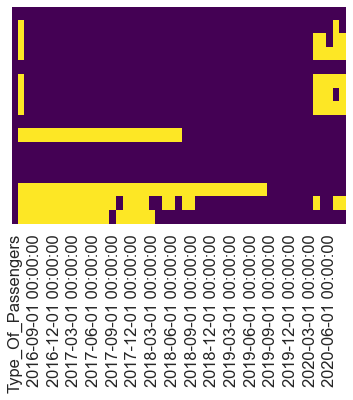

In [483]:
#Heatmap
#yellow colour represents the null values
sns.heatmap(Bus_New.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [484]:
#Null values replaced by 0
Bus_New.fillna(value=0,inplace=True)

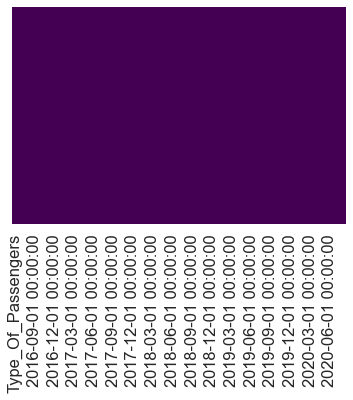

In [485]:
#Visualising the heatmap after removing null values
sns.heatmap(Bus_New.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

# Removing the dataset of year 2016 until 2019

In [486]:
#Dropping the dataset from 2016 until 2019 since we are using only 2020
Bus_2020=Bus_New.drop(Bus.columns[2:44], axis=1)

In [487]:
#Retrieving the columns that does not have any 0 values.
Bus_2020=Bus_2020.loc[:, (Bus_2020 != 0).any(axis=0)]

In [488]:
#The new datasets that only contains information of year 2020 
Bus_2020.head()

,Type_Of_Passengers,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,Adult,118752,127474,109989,50746.000,62683.000,76077.000,79438.000,75764.000
1,Adult Single Bus Trip 1,3506,3243,2053,1.000,1.000,3.000,0.000,1.000
2,Adult Single Bus Trip 2,1490,1350,726,0.000,0.000,3.000,0.000,0.000
3,Adult Single Bus Trip 3,239,207,145,0.000,0.000,0.000,0.000,0.000
4,Child/Youth,24157,25713,18031,4467.000,9112.000,13819.000,15137.000,13902.000


In [489]:
Bus_2020.shape

(16, 9)

In [490]:
#Changing the names of the columns in the bus dataset that has been cleaned
Bus_2020.columns = ['Types of Passengers','January','February',
                     'March','April','May','June','July', 'August']

In [491]:
Bus_2020.columns

Index(['Types of Passengers', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August'],
      dtype='object')

In [492]:
Bus_2020 

,Types of Passengers,January,February,March,April,May,June,July,August
0,Adult,118752,127474,109989,50746.000,62683.000,76077.000,79438.000,75764.000
1,Adult Single Bus Trip 1,3506,3243,2053,1.000,1.000,3.000,0.000,1.000
2,Adult Single Bus Trip 2,1490,1350,726,0.000,0.000,3.000,0.000,0.000
3,Adult Single Bus Trip 3,239,207,145,0.000,0.000,0.000,0.000,0.000
4,Child/Youth,24157,25713,18031,4467.000,9112.000,13819.000,15137.000,13902.000
5,Child/Youth Single Bus Trip 1,886,542,362,0.000,0.000,0.000,0.000,0.000
6,Child/Youth Single Bus Trip 2,518,364,219,0.000,0.000,0.000,2.000,0.000
7,Child/Youth Single Bus Trip 3,114,50,38,0.000,0.000,0.000,0.000,0.000
8,Concession,14246,19120,20385,4829.000,6748.000,9444.000,9387.000,9704.000
9,Employee,821,815,760,346.000,414.000,523.000,624.000,497.000


# Heatmap showing usage of bus between the months in 2020

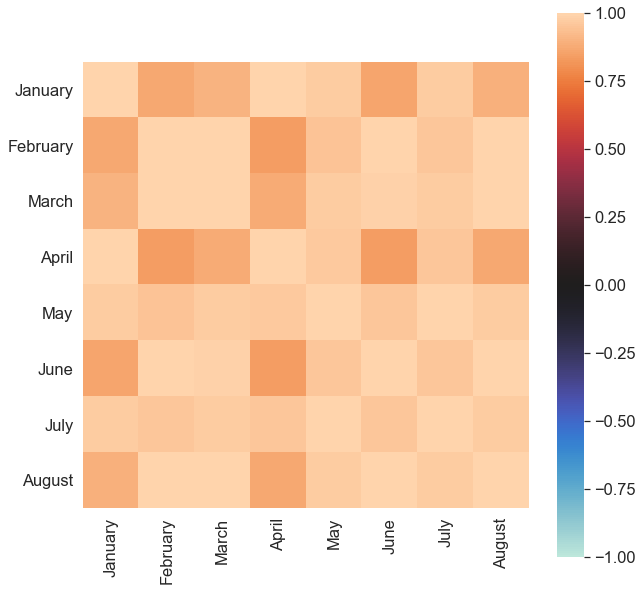

In [495]:
#Heatmap
correlation= Bus_2020.corr()
plt.figure(figsize=(10,10)) 
correlation_plot= sns.heatmap(correlation,vmin= -1, vmax=1, center=0, square=True)

### Interpretation: It can be seen from the above heatmap that June, July and August are closely related which means these months have nearly same number of passengers. Also, February and March show a strong relationship with nearly similar number of passengers in both the months. January and April, June and February, March and June, lastly May and July are correlated too. 

## Setting the colours in the palette

In [496]:
#Setting the colours in the palette
Color_palette = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]



# Scatter plot for the number of passengers travelled by bus from January to August 2020.

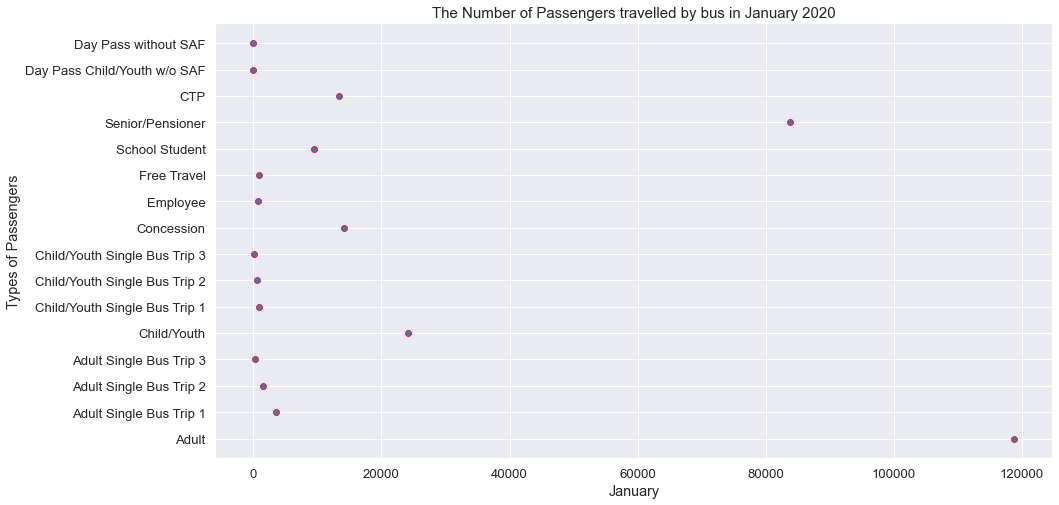

In [497]:
# January 
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='January', y='Types of Passengers', data=Bus_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by bus in January 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
From the scatter plot above, it can be observed that Adults has travelled the most in the month of January then it would be the Senior/Pensionner. Day Pass without SAF, Day Pass Child/Youth w/o SAF, Child/Youth Single Bus Trip 3 and Adult Single Bus Trip 3 had travelled the least in January.  

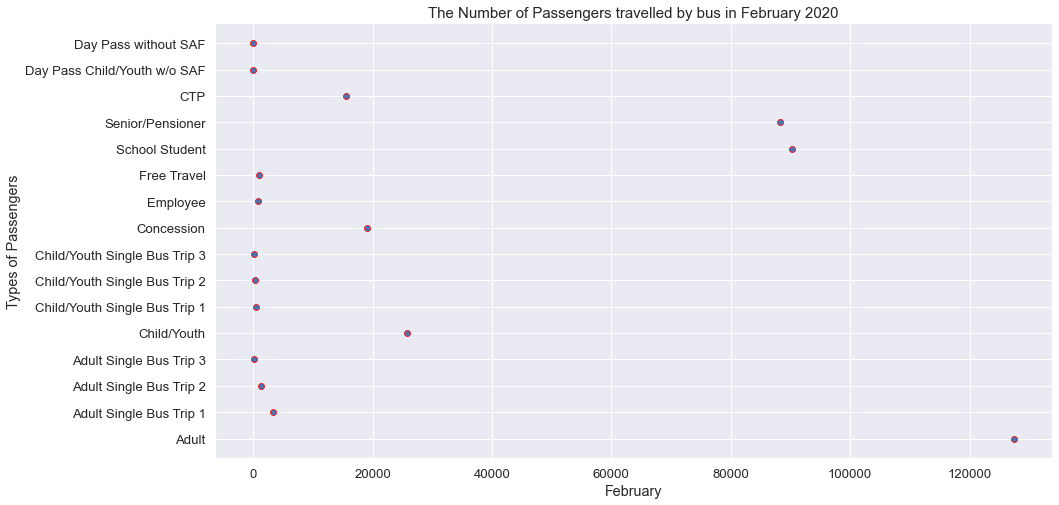

In [498]:
# February
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='February', y='Types of Passengers', data=Bus_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by bus in February 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
From the scatter plot above, it can be observed that Adults has travelled the most again in the month of January. The school students had travelled the most in February than January because school, university and college commence in February. Therefore there are many School Students who had travelled the most in February compared to January. Day Pass without SAF, Day Pass Child/Youth w/o SAF, Child/Youth Single Bus Trip 3, Child/Youth Single Bus Trip 2 and Adult Single Bus Trip 3 had travelled the least in February.

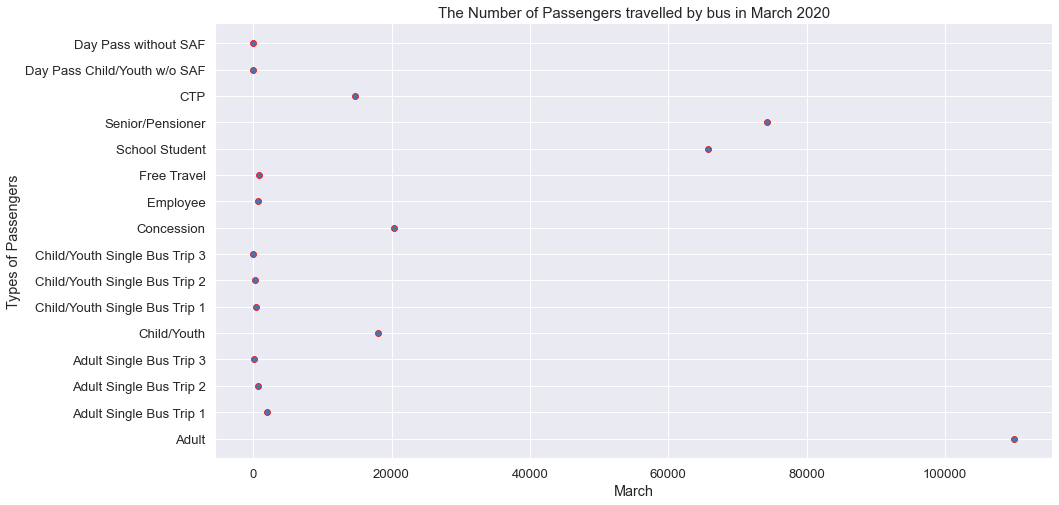

In [499]:
# March
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='March', y='Types of Passengers', data=Bus_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by bus in March 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
In March, Adults are the ones who travlled the most just like in January and February and Senior/Pensioner travelled the most compared to February. It can be seen that the concession opal card holder travellers has been increasing since January. 

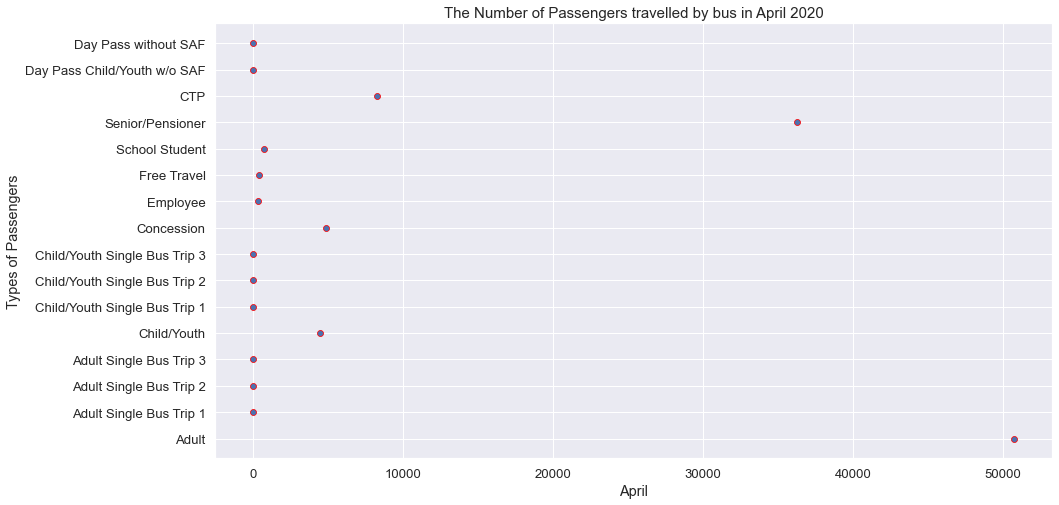

In [500]:
# April
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='April', y='Types of Passengers', data=Bus_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by bus in April 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
Adults are the ones who travelled the most in April as well. Since in April, the school break starts, it can be seen that the total number of school students who travelled by bus are quite less. Concession card travellers has decreased compared to the other 3 months above. 

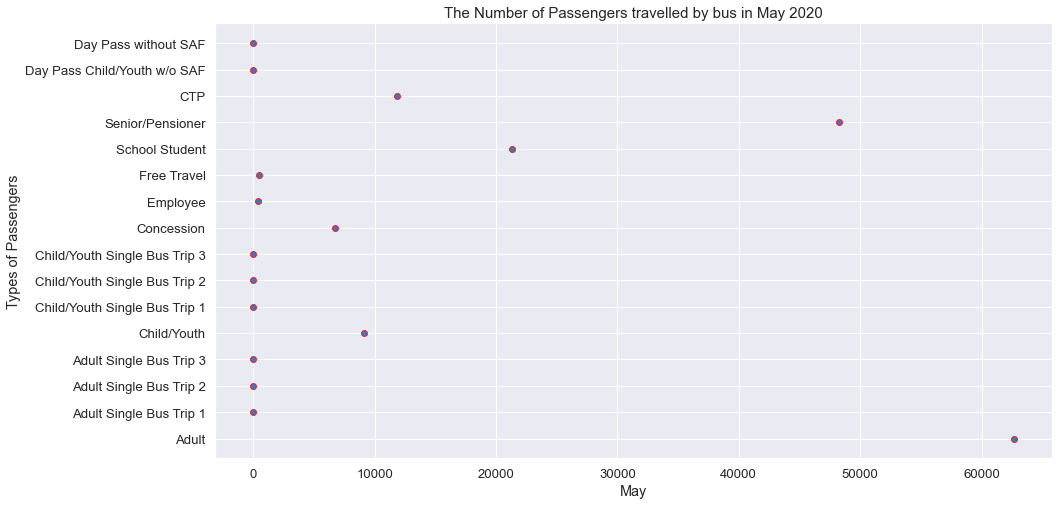

In [501]:
# May
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='May', y='Types of Passengers', data=Bus_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by bus in May 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
Adult and Senior/Pensioner are the once who travelled the most in May and the number of school students has increased compared to April. 

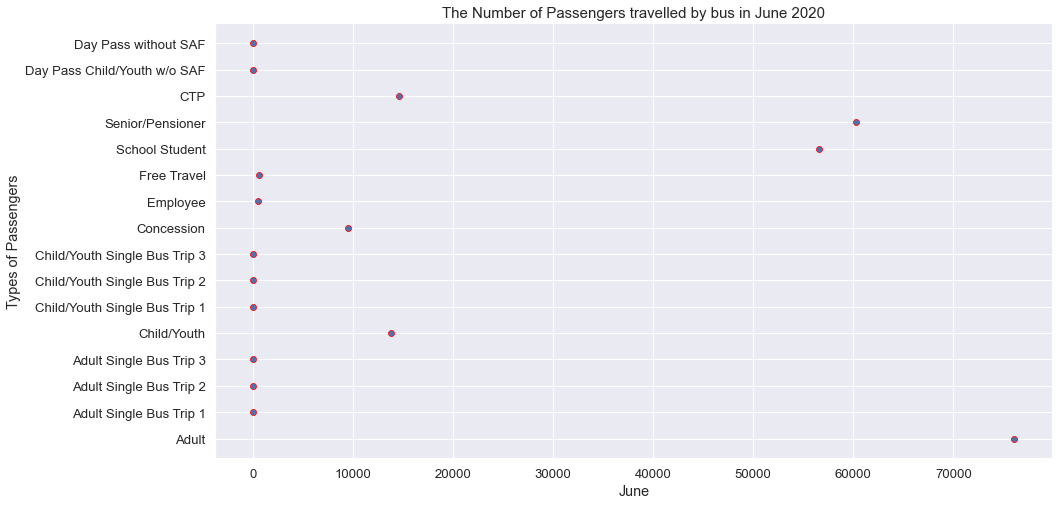

In [502]:
# June
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='June', y='Types of Passengers', data=Bus_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by bus in June 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
Adult, Senior/Pensioner and school student are the ones who travelled the most in June. Then it will be the CTP, child/youth and concession card holders. Other travellers did not travel as much as the other travellers.

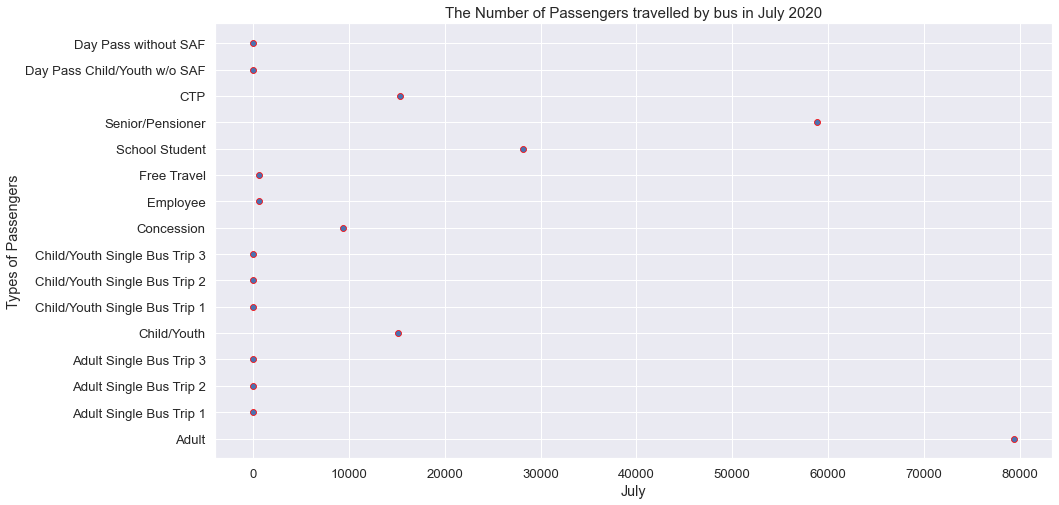

In [503]:
# July
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='July', y='Types of Passengers', data=Bus_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by bus in July 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
The number of school students who travelled by bus in July has reduced compared to June. Adults and Senior/Pensioner are the ones who travelled the most even in July.

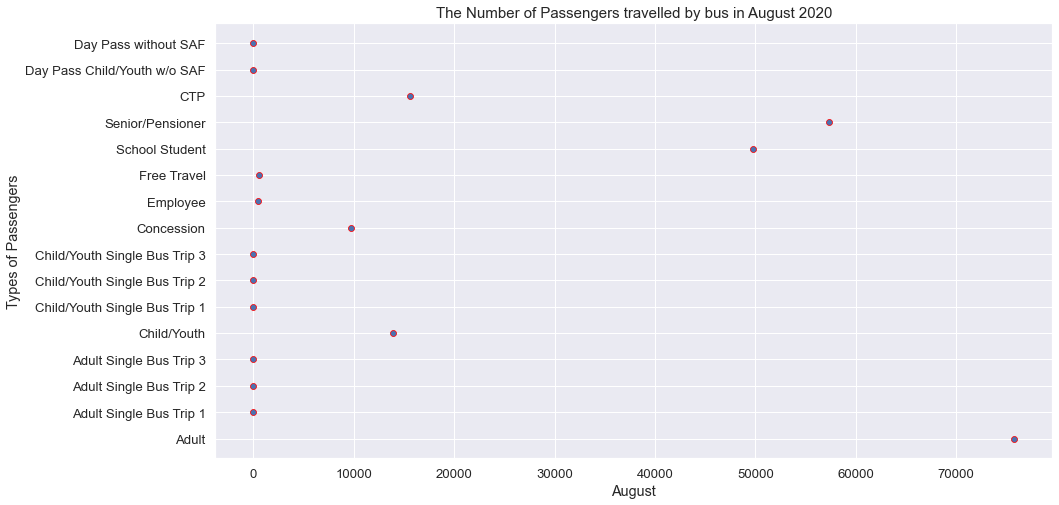

In [504]:
# August
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='August', y='Types of Passengers', data=Bus_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by bus in August 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
There number of adults who travelled by bus in August has decreased compared or July but the number of school students who had travelled has been increased. 

**Conclusion of Interpretation:<br>**
The number of Adults who travelled the most by bus is in February 2020. Some adults can even be the international students in university who would not have the concession card and in february all the university might be starting their classes and students might be travelling by bus with opal bus adult card. Therefore the number of adults is high in February. In March, the lockdown was imposed and we can observe a significant drop in the number of adults who had travelled. The number of bus travellers dropped from February because of the lockdown and in May the number had started to increase a little as the lockdown was loosening up. The number of travellers was the lowest in April

# The statistics of opal bus data

In [505]:
Bus_2020.describe()

,January,February,March,April,May,June,July,August
count,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000
mean,17020.938,23376.688,19271.562,6627.062,10053.562,14489.250,12971.125,13948.438
std,34215.455,40602.376,33627.201,14834.910,18914.481,25496.906,23704.636,24399.089
min,5.000,3.000,2.000,0.000,0.000,0.000,0.000,0.000
25%,448.250,324.750,200.500,0.000,0.000,0.750,0.000,0.000
50%,1188.000,1187.500,789.000,177.000,209.000,267.000,309.000,250.500
75%,13622.000,20768.250,18619.500,4557.500,9793.000,13999.250,15188.000,14318.250
max,118752.000,127474.000,109989.000,50746.000,62683.000,76077.000,79438.000,75764.000


# Boxplot of distribution of the opal bus usage monthly

Text(0.5, 1.0, 'Boxplot of Distribution of usage of Bus for 8 months')

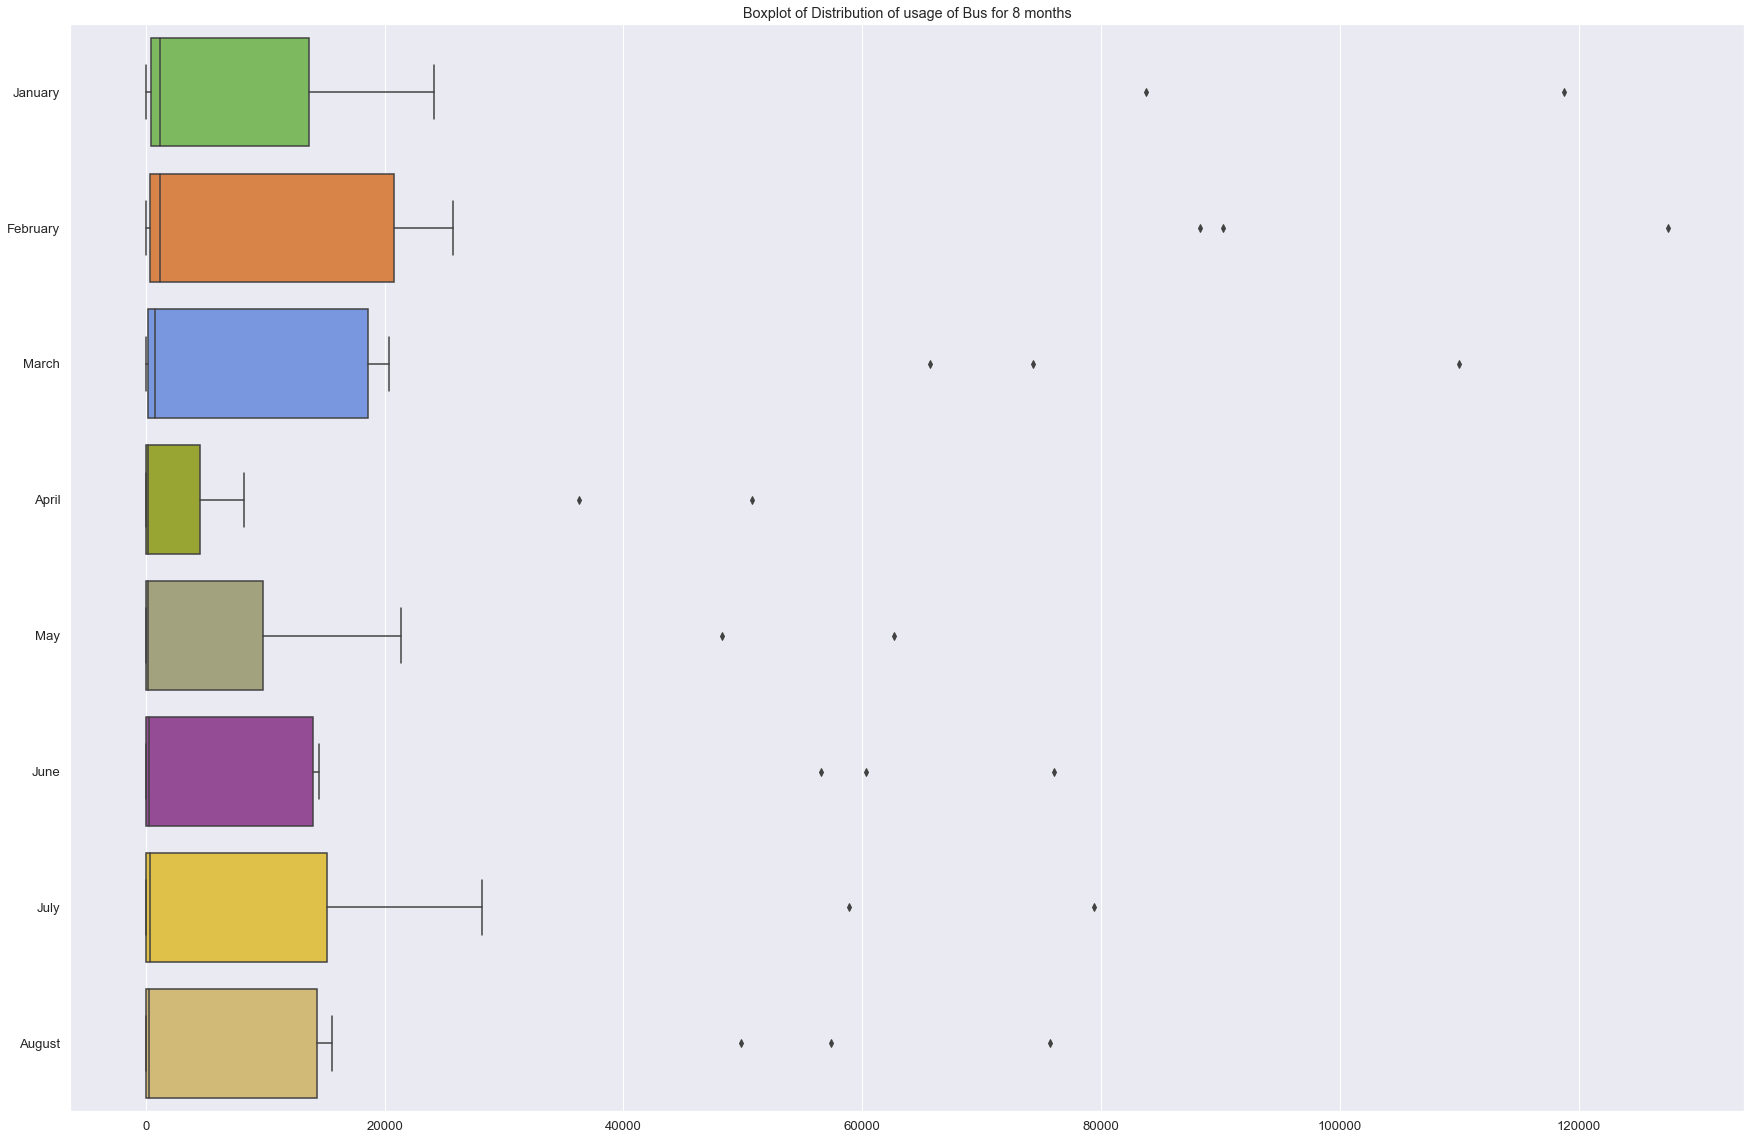

In [506]:
#Boxplot
plt.figure(figsize=(30,20))
sns.boxplot(data=Bus_2020, palette = Color_palette , orient='horizontal')
plt.title("Boxplot of Distribution of usage of Bus for 8 months")

**Interpretation of Boxplot:<br>**
There is a lot of outliers that can be observed in the boxplot above. The box plot for every month is  positively skewed and the median is pretty low from January to August and that is because the variance in the number of the passengers in each category for each month is high. For instance, the highest mean is for Adults which is 87615.375 and the lowest is for Day Pass Child/Youth w/o SAF which is 1.500. 

In [507]:
Bus_New.columns

Index(['Type_Of_Passengers',  2016-07-01 00:00:00,  2016-08-01 00:00:00,
        2016-09-01 00:00:00,  2016-10-01 00:00:00,  2016-11-01 00:00:00,
        2016-12-01 00:00:00,  2017-01-01 00:00:00,  2017-02-01 00:00:00,
        2017-03-01 00:00:00,  2017-04-01 00:00:00,  2017-05-01 00:00:00,
        2017-06-01 00:00:00,  2017-07-01 00:00:00,  2017-08-01 00:00:00,
        2017-09-01 00:00:00,  2017-10-01 00:00:00,  2017-11-01 00:00:00,
        2017-12-01 00:00:00,  2018-01-01 00:00:00,  2018-02-01 00:00:00,
        2018-03-01 00:00:00,  2018-04-01 00:00:00,  2018-05-01 00:00:00,
        2018-06-01 00:00:00,  2018-07-01 00:00:00,  2018-08-01 00:00:00,
        2018-09-01 00:00:00,  2018-10-01 00:00:00,  2018-11-01 00:00:00,
        2018-12-01 00:00:00,  2019-01-01 00:00:00,  2019-02-01 00:00:00,
        2019-03-01 00:00:00,  2019-04-01 00:00:00,  2019-05-01 00:00:00,
        2019-06-01 00:00:00,  2019-07-01 00:00:00,  2019-08-01 00:00:00,
        2019-09-01 00:00:00,  2019-10-01 00:00:00, 

## Changing the index of Bus_2020 dataset

In [508]:
#Changing the index so that it can me consistent while joining with other datasets.
Bus_2020=Bus_2020.set_index('Types of Passengers').T


In [509]:
Bus_2020

Types of Passengers,Adult,Adult Single Bus Trip 1,Adult Single Bus Trip 2,Adult Single Bus Trip 3,Child/Youth,Child/Youth Single Bus Trip 1,Child/Youth Single Bus Trip 2,Child/Youth Single Bus Trip 3,Concession,Employee,Free Travel,School Student,Senior/Pensioner,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF
January,118752.000,3506.000,1490.000,239.000,24157.000,886.000,518.000,114.000,14246.000,821.000,882.000,9497.000,83786.000,13414.000,5.000,22.000
February,127474.000,3243.000,1350.000,207.000,25713.000,542.000,364.000,50.000,19120.000,815.000,1025.000,90252.000,88280.000,15561.000,3.000,28.000
March,109989.000,2053.000,726.000,145.000,18031.000,362.000,219.000,38.000,20385.000,760.000,818.000,65717.000,74314.000,14778.000,2.000,8.000
April,50746.000,1.000,0.000,0.000,4467.000,0.000,0.000,0.000,4829.000,346.000,413.000,684.000,36283.000,8256.000,0.000,8.000
May,62683.000,1.000,0.000,0.000,9112.000,0.000,0.000,0.000,6748.000,414.000,446.000,21344.000,48268.000,11836.000,1.000,4.000
June,76077.000,3.000,3.000,0.000,13819.000,0.000,0.000,0.000,9444.000,523.000,588.000,56517.000,60302.000,14540.000,1.000,11.000
July,79438.000,0.000,0.000,0.000,15137.000,0.000,2.000,0.000,9387.000,624.000,611.000,28114.000,58877.000,15341.000,0.000,7.000
August,75764.000,1.000,0.000,0.000,13902.000,0.000,0.000,0.000,9704.000,497.000,558.000,49807.000,57371.000,15567.000,0.000,4.000


In [510]:
Bus_New.columns

Index(['Type_Of_Passengers',  2016-07-01 00:00:00,  2016-08-01 00:00:00,
        2016-09-01 00:00:00,  2016-10-01 00:00:00,  2016-11-01 00:00:00,
        2016-12-01 00:00:00,  2017-01-01 00:00:00,  2017-02-01 00:00:00,
        2017-03-01 00:00:00,  2017-04-01 00:00:00,  2017-05-01 00:00:00,
        2017-06-01 00:00:00,  2017-07-01 00:00:00,  2017-08-01 00:00:00,
        2017-09-01 00:00:00,  2017-10-01 00:00:00,  2017-11-01 00:00:00,
        2017-12-01 00:00:00,  2018-01-01 00:00:00,  2018-02-01 00:00:00,
        2018-03-01 00:00:00,  2018-04-01 00:00:00,  2018-05-01 00:00:00,
        2018-06-01 00:00:00,  2018-07-01 00:00:00,  2018-08-01 00:00:00,
        2018-09-01 00:00:00,  2018-10-01 00:00:00,  2018-11-01 00:00:00,
        2018-12-01 00:00:00,  2019-01-01 00:00:00,  2019-02-01 00:00:00,
        2019-03-01 00:00:00,  2019-04-01 00:00:00,  2019-05-01 00:00:00,
        2019-06-01 00:00:00,  2019-07-01 00:00:00,  2019-08-01 00:00:00,
        2019-09-01 00:00:00,  2019-10-01 00:00:00, 

## Exploring Opal Train Data

In [625]:
#Reading train datasets
Train = pd.read_excel('files/Train.xlsx')
Train.head()

,Unnamed: 0,Unnamed: 1,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,T3 Bankstown Line,Employee,13196.000,15391.000,15547.000,15093.000,16371.000,15432.000,13597.000,14636.000,...,17792,16324,15967,16100,14335,9302.000,9613.000,12288,12836,11715
1,T3 Bankstown Line,Free Travel,1087.000,1328.000,1338.000,1361.000,1545.000,1396.000,1221.000,1360.000,...,1795,1628,1415,1466,1087,356.000,527.000,887,948,770
2,T3 Bankstown Line,School Student,28934.000,68907.000,50754.000,46327.000,62104.000,26485.000,3824.000,60165.000,...,73483,37711,7222,70329,52495,723.000,22469.000,60685,33011,55617
3,T3 Bankstown Line,Senior/Pensioner,227938.000,255536.000,251984.000,259218.000,262304.000,247124.000,235756.000,228102.000,...,264217,253958,244946,227233,170736,77424.000,101267.000,154230,157727,141012
4,T3 Bankstown Line,Sgl Trip Rail Adult,4303.000,14894.000,15599.000,15796.000,15247.000,19491.000,16062.000,14125.000,...,9013,10065,8952,7304,4448,1061.000,1595.000,2736,2811,2015


In [626]:
Train.shape

(12, 52)

In [627]:
Train.columns

Index([       'Unnamed: 0',        'Unnamed: 1', 2016-07-01 00:00:00,
       2016-08-01 00:00:00, 2016-09-01 00:00:00, 2016-10-01 00:00:00,
       2016-11-01 00:00:00, 2016-12-01 00:00:00, 2017-01-01 00:00:00,
       2017-02-01 00:00:00, 2017-03-01 00:00:00, 2017-04-01 00:00:00,
       2017-05-01 00:00:00, 2017-06-01 00:00:00, 2017-07-01 00:00:00,
       2017-08-01 00:00:00, 2017-09-01 00:00:00, 2017-10-01 00:00:00,
       2017-11-01 00:00:00, 2017-12-01 00:00:00, 2018-01-01 00:00:00,
       2018-02-01 00:00:00, 2018-03-01 00:00:00, 2018-04-01 00:00:00,
       2018-05-01 00:00:00, 2018-06-01 00:00:00, 2018-07-01 00:00:00,
       2018-08-01 00:00:00, 2018-09-01 00:00:00, 2018-10-01 00:00:00,
       2018-11-01 00:00:00, 2018-12-01 00:00:00, 2019-01-01 00:00:00,
       2019-02-01 00:00:00, 2019-03-01 00:00:00, 2019-04-01 00:00:00,
       2019-05-01 00:00:00, 2019-06-01 00:00:00, 2019-07-01 00:00:00,
       2019-08-01 00:00:00, 2019-09-01 00:00:00, 2019-10-01 00:00:00,
       2019-11-01 00

In [628]:
# Naming the unamed column 1 in train dataset
Train = Train.rename(columns={"Unnamed: 1": "Type_Of_Passengers"})

In [629]:
# The first column in the opal train dataset is sydney metro bus. 
# Dropping the first column in the opal train dataset since we don't need the information.
Train_New=Train.drop(Train.columns[:1], axis=1)

In [630]:
Train_New

,Type_Of_Passengers,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,Employee,13196.000,15391.000,15547.000,15093.000,16371.000,15432.000,13597.000,14636.000,17174.000,...,17792,16324,15967,16100,14335,9302.000,9613.000,12288,12836,11715
1,Free Travel,1087.000,1328.000,1338.000,1361.000,1545.000,1396.000,1221.000,1360.000,1448.000,...,1795,1628,1415,1466,1087,356.000,527.000,887,948,770
2,School Student,28934.000,68907.000,50754.000,46327.000,62104.000,26485.000,3824.000,60165.000,74103.000,...,73483,37711,7222,70329,52495,723.000,22469.000,60685,33011,55617
3,Senior/Pensioner,227938.000,255536.000,251984.000,259218.000,262304.000,247124.000,235756.000,228102.000,262193.000,...,264217,253958,244946,227233,170736,77424.000,101267.000,154230,157727,141012
4,Sgl Trip Rail Adult,4303.000,14894.000,15599.000,15796.000,15247.000,19491.000,16062.000,14125.000,15557.000,...,9013,10065,8952,7304,4448,1061.000,1595.000,2736,2811,2015
5,Sgl Trip Rail Child/Youth,1630.000,3929.000,4930.000,4582.000,3591.000,5661.000,5580.000,3184.000,3783.000,...,2690,4188,4538,2400,1621,544.000,1001.000,1594,2172,1345
6,Adult,3970697.000,4389115.000,4212808.000,4042741.000,4461496.000,4147929.000,3863971.000,4090553.000,4763437.000,...,4299504,3673566,3621442,3620407,2634216,825095.000,1196383.000,1548468,1811153,1626672
7,Child/Youth,175608.000,155625.000,179420.000,174816.000,170691.000,238791.000,239712.000,157792.000,167964.000,...,163673,206394,246406,148099,86029,14108.000,38105.000,63674,115795,63305
8,Concession,292557.000,343152.000,284622.000,266306.000,244085.000,211227.000,184810.000,216161.000,369528.000,...,248573,190117,175370,223074,193597,27136.000,51269.000,84489,115286,114764
9,CTP,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,662188,664312,768801,826923,596378,157178.000,285051.000,428762,534928,480483


## Visualising the null values in bus dataset

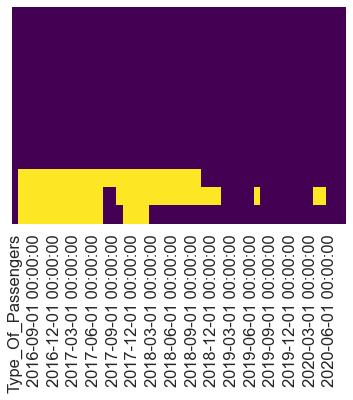

In [631]:
#Heatmap
#yellow colour represents the null values
sns.heatmap(Train_New.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [632]:
#Null values replaced by 0
Train_New.fillna(value=0,inplace=True)

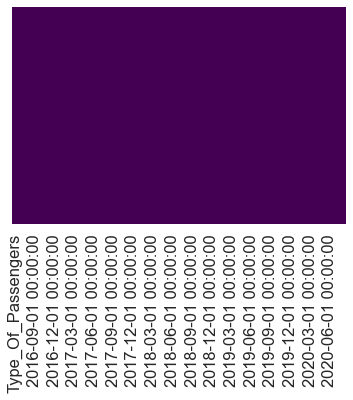

In [633]:
#Visualising the heatmap after removing null values
sns.heatmap(Train_New.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

# Removing the dataset of year 2016 until 2019

In [635]:
#Dropping the dataset from 2016 until 2019 since we are using only 2020
Train_2020=Train_New.drop(Train.columns[2:44], axis=1)

In [636]:
#Retrieving the columns that does not have any 0 values.
Train_2020=Train_2020.loc[:, (Train_2020 != 0).any(axis=0)]

In [637]:
#The new datasets that only contains information of year 2020 
Train_2020.head()

,Type_Of_Passengers,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,Employee,15967,16100,14335,9302.000,9613.000,12288,12836,11715
1,Free Travel,1415,1466,1087,356.000,527.000,887,948,770
2,School Student,7222,70329,52495,723.000,22469.000,60685,33011,55617
3,Senior/Pensioner,244946,227233,170736,77424.000,101267.000,154230,157727,141012
4,Sgl Trip Rail Adult,8952,7304,4448,1061.000,1595.000,2736,2811,2015


In [638]:
Train_2020.shape

(12, 9)

In [639]:
#Changing the names of the columns in the train dataset that has been cleaned
Train_2020.columns = ['Types of Passengers','January','February',
                     'March','April','May','June','July', 'August']

In [640]:
Train_2020.columns

Index(['Types of Passengers', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August'],
      dtype='object')

In [641]:
Train_2020 

,Types of Passengers,January,February,March,April,May,June,July,August
0,Employee,15967,16100,14335,9302.000,9613.000,12288,12836,11715
1,Free Travel,1415,1466,1087,356.000,527.000,887,948,770
2,School Student,7222,70329,52495,723.000,22469.000,60685,33011,55617
3,Senior/Pensioner,244946,227233,170736,77424.000,101267.000,154230,157727,141012
4,Sgl Trip Rail Adult,8952,7304,4448,1061.000,1595.000,2736,2811,2015
5,Sgl Trip Rail Child/Youth,4538,2400,1621,544.000,1001.000,1594,2172,1345
6,Adult,3621442,3620407,2634216,825095.000,1196383.000,1548468,1811153,1626672
7,Child/Youth,246406,148099,86029,14108.000,38105.000,63674,115795,63305
8,Concession,175370,223074,193597,27136.000,51269.000,84489,115286,114764
9,CTP,768801,826923,596378,157178.000,285051.000,428762,534928,480483


# Scatter plot for the number of passengers travelled by train from January to August 2020.

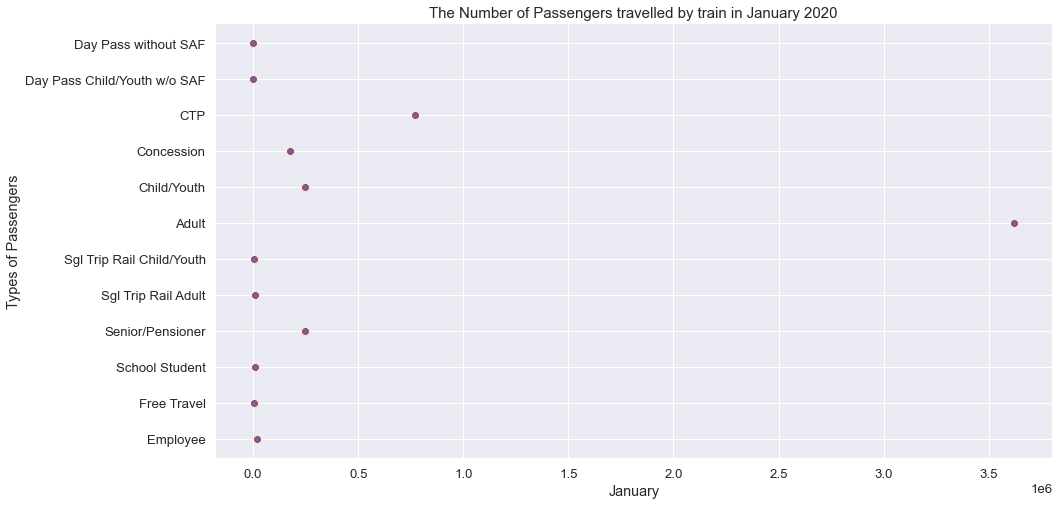

In [651]:
# January 
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='January', y='Types of Passengers', data=Train_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by train in January 2020', fontsize=15)
plt.show()

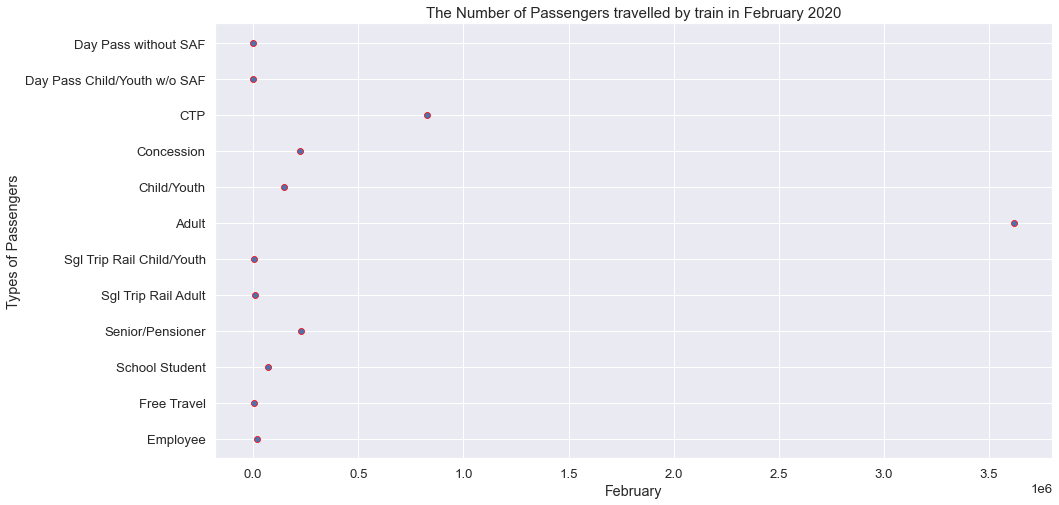

In [652]:
# February
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='February', y='Types of Passengers', data=Train_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by train in February 2020', fontsize=15)
plt.show()

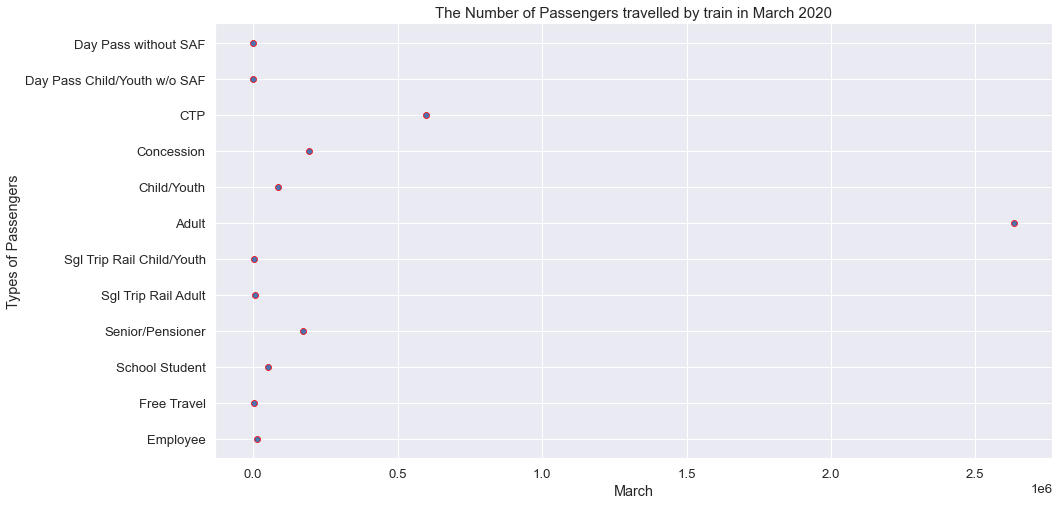

In [653]:
# March
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='March', y='Types of Passengers', data=Train_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by train in March 2020', fontsize=15)
plt.show()

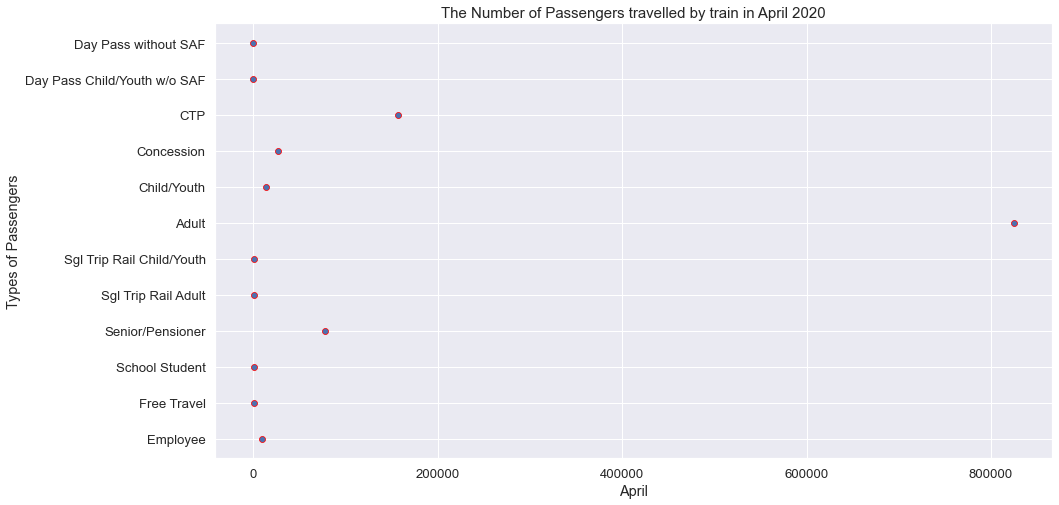

In [654]:
# April
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='April', y='Types of Passengers', data=Train_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by train in April 2020', fontsize=15)
plt.show()

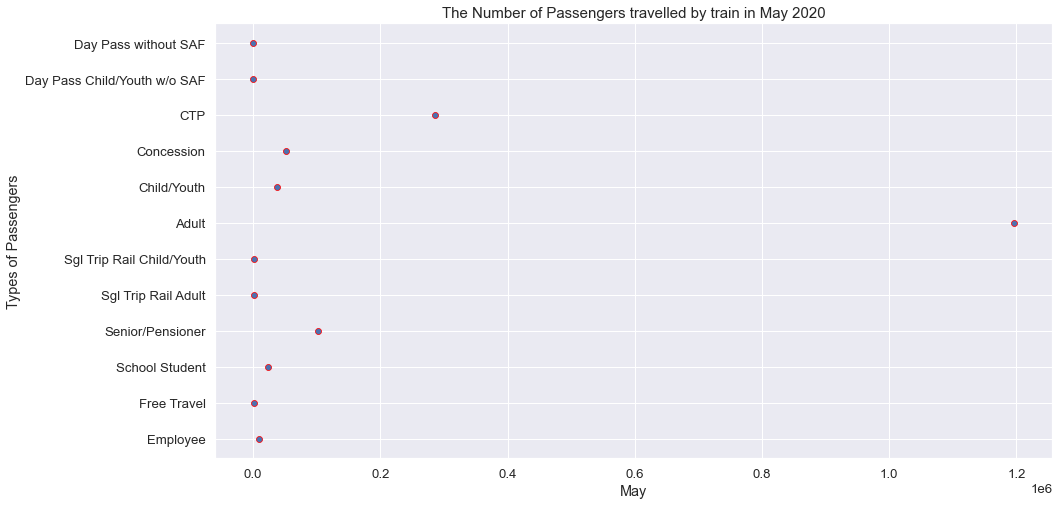

In [655]:
# May
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='May', y='Types of Passengers', data=Train_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by train in May 2020', fontsize=15)
plt.show()

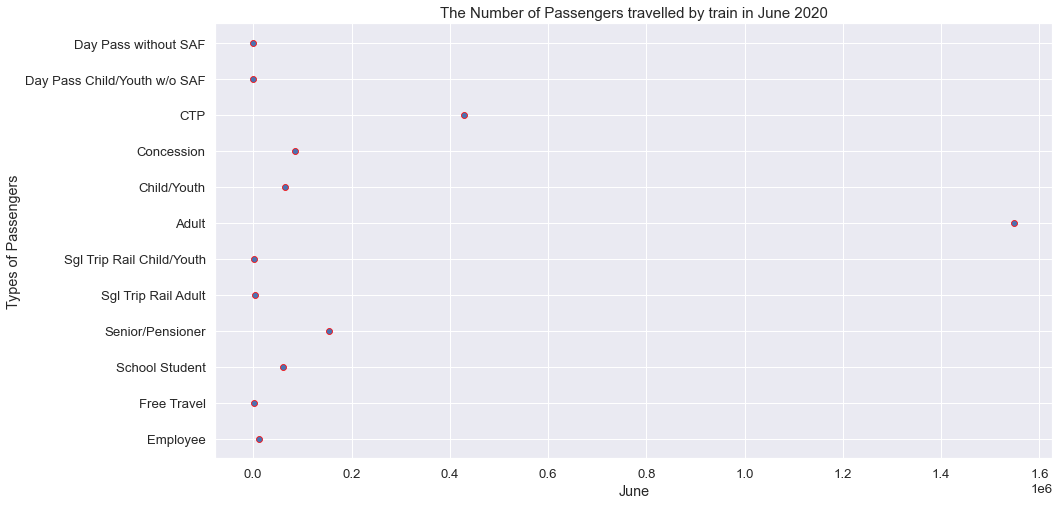

In [656]:
# June
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='June', y='Types of Passengers', data=Train_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by train in June 2020', fontsize=15)
plt.show()

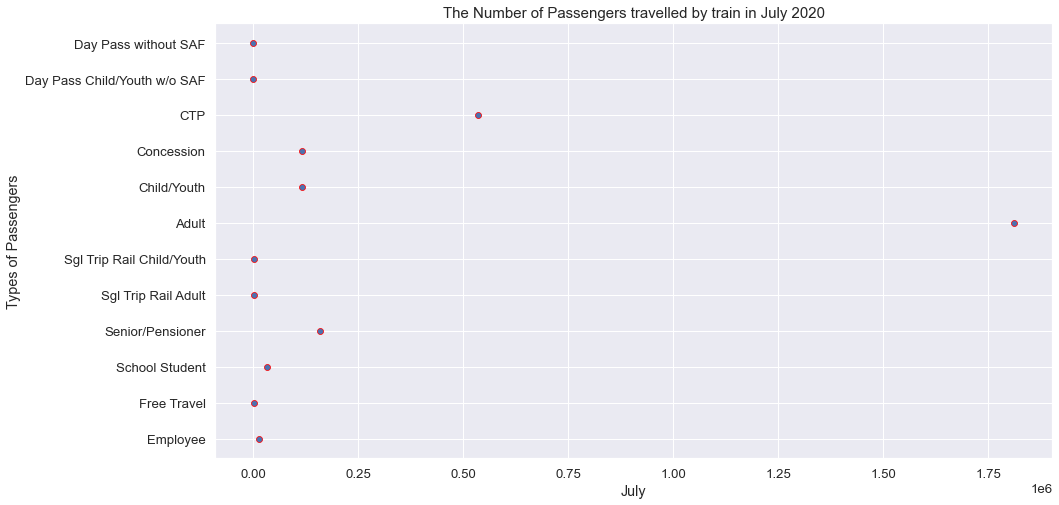

In [657]:
# July
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='July', y='Types of Passengers', data=Train_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by train in July 2020', fontsize=15)
plt.show()

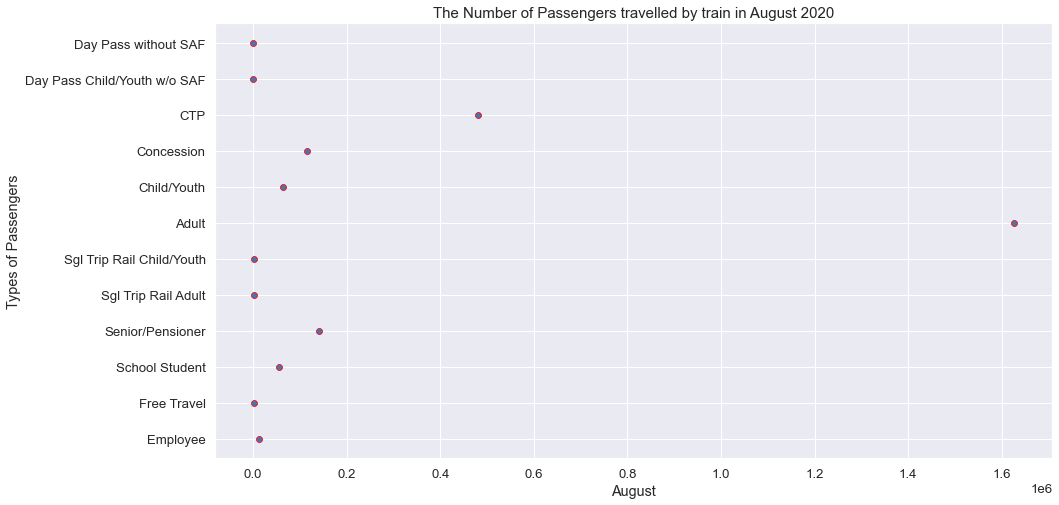

In [658]:
# August
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
sns.scatterplot(x='August', y='Types of Passengers', data=Train_2020, edgecolor = 'red')
plt.title('The Number of Passengers travelled by train in August 2020', fontsize=15)
plt.show()

**Interpretation:<br>**
The number of Adults who travelled the most by train is in January 2020.In March, the lockdown was imposed and we can observe a significant drop in the number of adults who had travelled just like in bus. The number of train travellers dropped from February because of the lockdown and in May the number had started to increase a little as the lockdown was loosening up. The number of travellers was the lowest in April

# The statistics of opal train data

In [659]:
Train_2020.describe()

,January,February,March,April,May,June,July,August
count,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000
mean,424604.250,428624.917,312923.333,92745.833,142277.333,196490.083,232227.917,208143.500
std,1031076.704,1031993.370,750558.876,235349.581,341734.729,442833.224,519799.844,466840.517
min,13.000,10.000,22.000,0.000,0.000,4.000,12.000,3.000
25%,3757.250,2166.500,1487.500,497.000,882.500,1417.250,1866.000,1201.250
50%,12459.500,43214.500,33415.000,5181.500,16041.000,36486.500,22923.500,33666.000
75%,245311.000,224113.750,176451.250,39708.000,63768.500,101924.250,126278.000,121326.000
max,3621442.000,3620407.000,2634216.000,825095.000,1196383.000,1548468.000,1811153.000,1626672.000


# Boxplot of distribution of the opal train usage monthly

Text(0.5, 1.0, 'Boxplot of Distribution of usage of Train for 8 months')

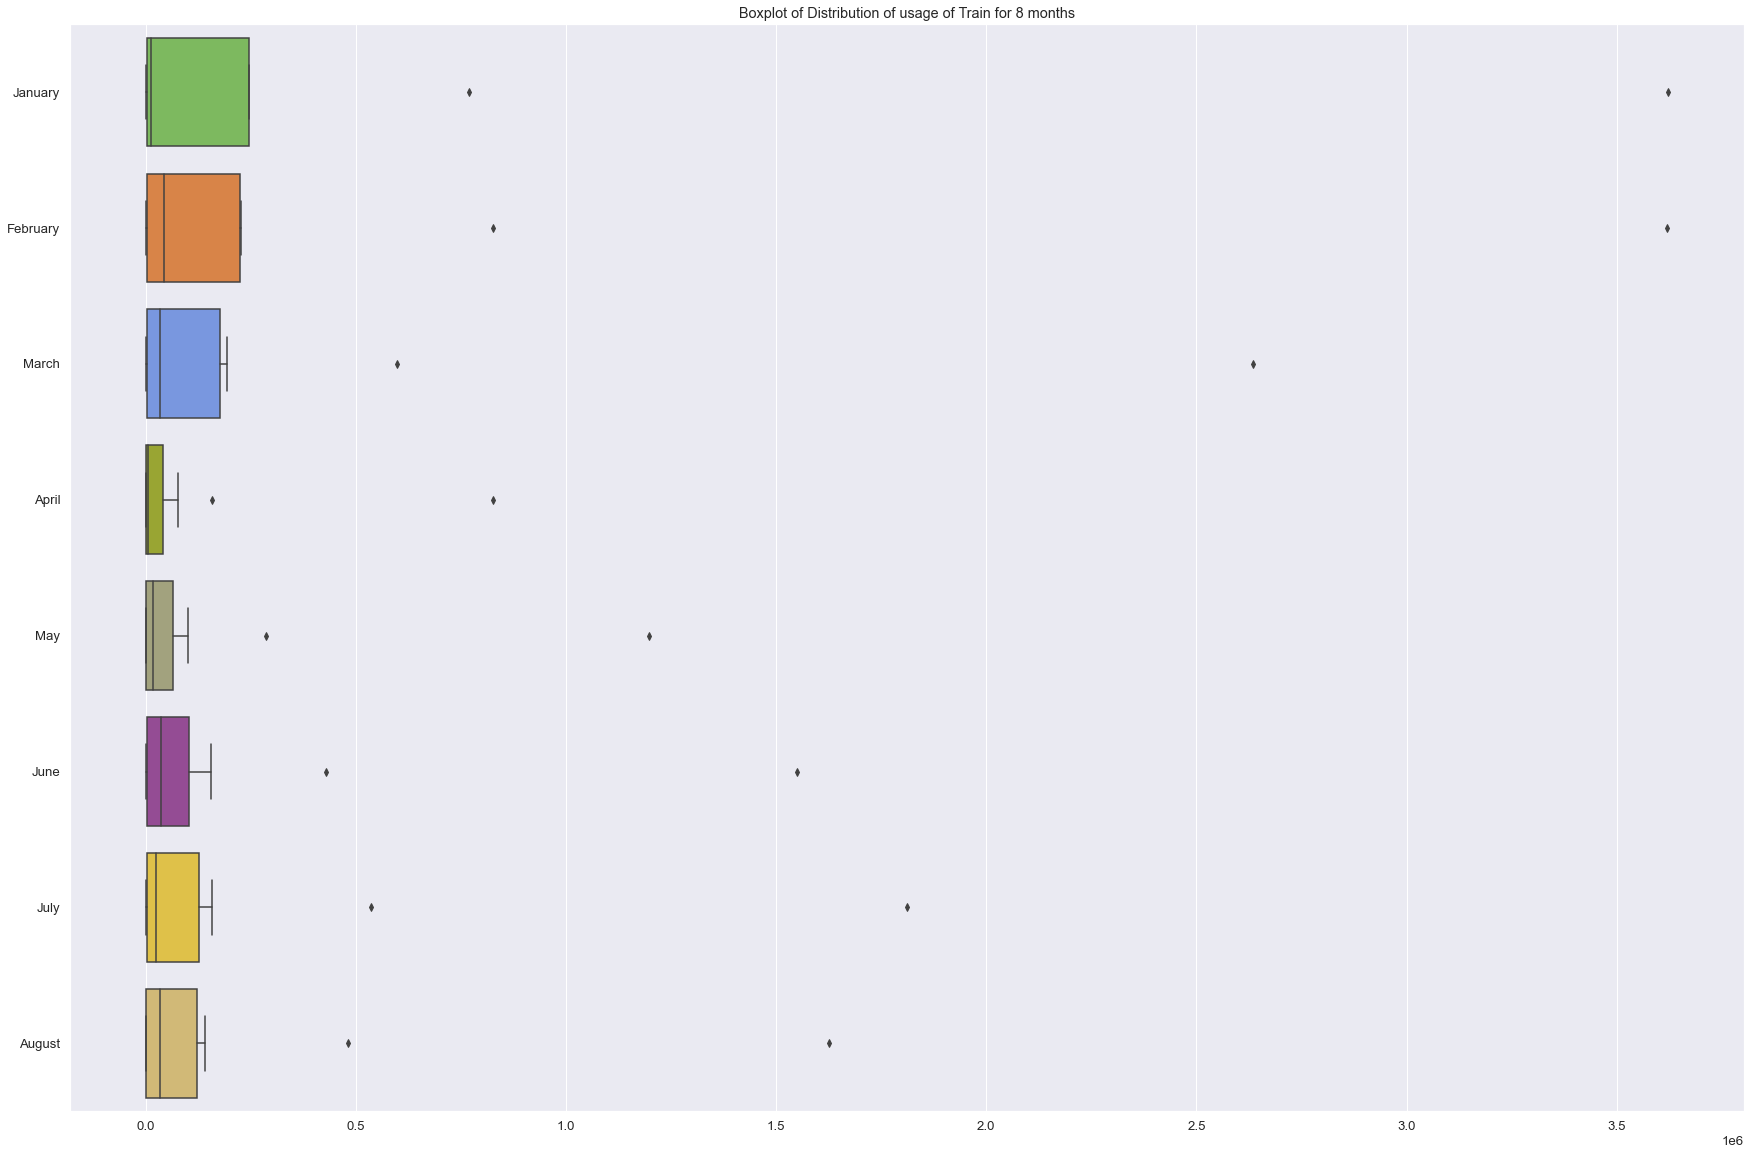

In [660]:
#Boxplot
plt.figure(figsize=(30,20))
sns.boxplot(data=Train_2020, palette = Color_palette , orient='horizontal')
plt.title("Boxplot of Distribution of usage of Train for 8 months")

**Intepretation of Boxplot:<br>**
There is a lot of outliers that can be observed in the boxplot above. The box plot for every month is  positively skewed and the median is pretty low from January to August and that is because the variance in the number of the passengers in each category for each month is high. The bus have larger variance in the number of passengers than the train.

## Changing the index of Train_2020 dataset

In [661]:
#Changing the index so that it can me consistent while joining with other datasets.
Train_2020=Train_2020.set_index('Types of Passengers').T

In [662]:
Train_2020

Types of Passengers,Employee,Free Travel,School Student,Senior/Pensioner,Sgl Trip Rail Adult,Sgl Trip Rail Child/Youth,Adult,Child/Youth,Concession,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF
January,15967.000,1415.000,7222.000,244946.000,8952.000,4538.000,3621442.000,246406.000,175370.000,768801.000,13.000,179.000
February,16100.000,1466.000,70329.000,227233.000,7304.000,2400.000,3620407.000,148099.000,223074.000,826923.000,10.000,154.000
March,14335.000,1087.000,52495.000,170736.000,4448.000,1621.000,2634216.000,86029.000,193597.000,596378.000,22.000,116.000
April,9302.000,356.000,723.000,77424.000,1061.000,544.000,825095.000,14108.000,27136.000,157178.000,0.000,23.000
May,9613.000,527.000,22469.000,101267.000,1595.000,1001.000,1196383.000,38105.000,51269.000,285051.000,0.000,48.000
June,12288.000,887.000,60685.000,154230.000,2736.000,1594.000,1548468.000,63674.000,84489.000,428762.000,4.000,64.000
July,12836.000,948.000,33011.000,157727.000,2811.000,2172.000,1811153.000,115795.000,115286.000,534928.000,12.000,56.000
August,11715.000,770.000,55617.000,141012.000,2015.000,1345.000,1626672.000,63305.000,114764.000,480483.000,3.000,21.000


In [663]:
Train_2020.columns

Index(['Employee', 'Free Travel', 'School Student', 'Senior/Pensioner',
       'Sgl Trip Rail Adult', 'Sgl Trip Rail Child/Youth', 'Adult',
       'Child/Youth', 'Concession', 'CTP', 'Day Pass Child/Youth w/o SAF',
       'Day Pass without SAF'],
      dtype='object', name='Types of Passengers')

# Exploring the Climate Dataset

In [664]:
#Reading the Climate Dataset of January
Jan = pd.read_csv('files/Jan2020_climate.csv', encoding = "ISO-8859-1")
Jan.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2020,18.900,27.300,0.000,14.200,4.500,SSW,39,23:28,20.900,...,8.000,S,11,1015.000,24.900,60,5.000,ESE,24,1013.500
1,2/01/2020,19.300,29.000,0.000,7.200,5.300,SSW,35,23:02,22.600,...,7.000,ESE,17,1019.800,27.200,51,7.000,ESE,20,1017.400
2,3/01/2020,21.900,29.400,0.000,nan,8.200,NE,43,16:22,24.100,...,8.000,WNW,9,1017.500,27.600,68,0.000,E,26,1012.500
3,4/01/2020,20.900,36.400,0.000,15.400,10.500,S,81,22:23,26.600,...,1.000,E,9,1010.200,33.000,45,3.000,E,20,1004.800
4,5/01/2020,21.400,26.600,0.000,16.000,4.400,SSW,67,23:05,22.500,...,6.000,S,20,1018.500,24.000,60,6.000,S,26,1018.200


In [665]:
#Setting their index and getting the mean of the January month in climate dataset.
del Jan["Date"]
Jan = pd.DataFrame(Jan.mean().to_dict(),index=[Jan.index.values[0]])
Jan.insert(0, "Month", "January", True) 
Jan.reset_index(drop=True)
Jan=Jan.set_index('Month')

In [666]:
Jan

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,
January,20.594,28.971,2.561,7.760,5.400,45.613,23.103,78.839,6.000,1013.735,27.294,64.581,5.133,21.613,1011.142


In [667]:
Jan.columns

Index(['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Speed of maximum wind gust (km/h)', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am MSL pressure (hPa)', '3pm Temperature (°C)',
       '3pm relative humidity (%)', '3pm cloud amount (oktas)',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')

In [668]:
#Reading the Climate Dataset of February
Feb = pd.read_csv('files/Feb2020_climate.csv', encoding = "ISO-8859-1")
Feb.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/02/2020,23.700,36.400,0.000,9.600,11.300,NNE,56,16:02,26.500,...,0,E,13,1011.000,35.500,48,1,NE,17,1006.900
1,2/02/2020,24.600,31.100,0.000,10.000,3.100,SSE,44,15:08,25.300,...,4,S,13,1007.100,29.300,69,6,SE,26,1005.100
2,3/02/2020,22.200,31.700,23.000,7.800,6.900,SSE,72,17:51,23.300,...,8,SSE,11,1006.100,28.800,66,5,E,19,1003.100
3,4/02/2020,18.200,23.700,3.000,9.400,4.500,SSE,54,0:21,18.900,...,6,SSW,22,1020.800,21.600,56,7,ESE,20,1020.900
4,5/02/2020,17.900,27.400,0.600,7.000,9.300,E,37,15:19,20.500,...,3,W,9,1021.200,25.900,57,7,E,20,1018.500


In [669]:
#Setting their index and getting the mean of the February month in climate dataset.
del Feb["Date"]
Feb = pd.DataFrame(Feb.mean().to_dict(),index=[Feb.index.values[0]])
Feb.insert(0, "Month", "February", True) 
Feb.reset_index(drop=True)
Feb=Feb.set_index('Month')
Feb

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,
February,20.000,27.479,14.979,6.831,6.279,47.448,21.945,81.893,4.862,1013.938,25.817,68.069,5.690,21.034,1012.034


In [670]:
#Reading the Climate Dataset of March
Mar = pd.read_csv('files/March2020_climate.csv', encoding = "ISO-8859-1")
Mar.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/03/2020,18.700,29.700,0.000,5.400,10.500,NNE,48,18:15,21.100,...,1,WNW,4,1014.400,28.200,62,5,ENE,20,1010.200
1,2/03/2020,20.000,38.000,0.000,9.600,9.100,S,80,15:35,23.400,...,3,W,17,1009.200,37.500,19,7,E,9,1007.300
2,3/03/2020,20.400,21.900,0.000,10.000,0.000,SSE,31,0:18,21.300,...,8,SSE,15,1019.100,20.500,81,8,SSW,13,1019.600
3,4/03/2020,18.600,25.600,22.400,1.400,0.000,ENE,46,7:41,19.900,...,8,E,28,1019.400,24.700,74,7,ENE,15,1016.300
4,5/03/2020,19.900,22.800,8.000,3.200,0.000,NNE,54,15:10,22.100,...,7,NE,15,1011.900,20.900,98,7,N,19,1008.000


In [671]:
#Setting their index and getting the mean of the March month in climate dataset.
del Mar["Date"]
Mar = pd.DataFrame(Mar.mean().to_dict(),index=[Mar.index.values[0]])
Mar.insert(0, "Month", "March", True) 
Mar.reset_index(drop=True)
Mar=Mar.set_index('Month')
Mar

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,,
March,17.216,25.619,5.852,5.213,5.897,40.290,19.039,87.581,5.129,13.484,1020.290,24.103,65.806,5.581,18.645,1018.597


In [672]:
#Reading the Climate Dataset of April
Apr = pd.read_csv('files/April2020_climate.csv', encoding = "ISO-8859-1")
Apr.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/04/2020,18.100,24.800,0.000,4.600,0.800,ENE,35,15:25,22.100,...,7,E,13,1019.900,24.500,78,7,ENE,17,1017.600
1,2/04/2020,18.800,25.400,0.000,3.800,2.200,NE,33,9:16,20.600,...,7,NNE,7,1015.200,22.500,81,8,N,9,1011.600
2,3/04/2020,17.500,25.800,4.800,1.800,3.400,NE,31,19:01,18.800,...,3,ESE,6,1010.400,25.100,71,7,E,17,1006.100
3,4/04/2020,18.800,25.600,7.200,3.200,8.200,W,65,12:22,20.100,...,6,NNW,28,998.500,23.900,36,1,WNW,31,1000.800
4,5/04/2020,14.000,24.900,0.000,9.800,10.600,NNW,41,9:26,18.600,...,3,NW,19,1014.100,24.200,33,1,WNW,17,1011.100


In [673]:
#Setting their index and getting the mean of the April month in climate dataset.
del Apr["Date"]
Apr = pd.DataFrame(Apr.mean().to_dict(),index=[Apr.index.values[0]])
Apr.insert(0, "Month", "April", True) 
Apr.reset_index(drop=True)
Apr=Apr.set_index('Month')
Apr

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,,
April,15.360,24.483,0.987,5.464,6.279,37.800,18.750,73.733,4.300,13.967,1017.233,22.953,57.433,4.367,17.567,1014.337


In [674]:
#Reading the Climate Dataset of May
May = pd.read_csv('files/May2020_climate.csv', encoding = "ISO-8859-1")
May.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/05/2020,10.300,16.700,17.200,0.600,10.200,W,70,12:24,13.800,...,3,NW,22,1009.000,16.000,38,3,NW,41,1005.800
1,2/05/2020,12.400,18.300,0.000,6.600,10.100,WNW,67,10:32,14.900,...,3,NW,33,1005.200,18.200,35,1,WNW,35,1002.800
2,3/05/2020,10.800,19.600,0.000,7.200,10.200,W,43,8:49,13.800,...,1,W,28,1017.000,19.000,39,1,SSW,17,1018.300
3,4/05/2020,9.500,19.400,0.000,4.000,9.400,SSW,39,15:58,13.400,...,1,W,22,1025.900,17.300,53,4,S,20,1024.900
4,5/05/2020,11.700,20.900,11.400,3.800,7.500,SSW,35,11:31,14.300,...,6,W,20,1030.700,20.500,66,2,S,15,1028.900


In [675]:
#Setting their index and getting the mean of the May month in climate dataset.
del May["Date"]
May = pd.DataFrame(May.mean().to_dict(),index=[May.index.values[0]])
May.insert(0, "Month", "May", True) 
May.reset_index(drop=True)
May=May.set_index('Month')
May

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,,
May,11.503,20.252,4.458,3.906,6.020,40.613,14.123,78.226,3.968,20.000,1021.835,19.177,58.968,4.355,17.613,1019.500


In [676]:
#Reading the Climate Dataset of June
Jun = pd.read_csv('files/June2020_climate.csv', encoding = "ISO-8859-1")
Jun.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/06/2020,14.400,22.600,0.000,2.800,7.600,NNW,61,14:51,17.900,...,3,N,22,1009.300,21.600,35.000,5,NNW,37,1005.500
1,2/06/2020,7.800,14.900,4.800,6.800,0.800,WSW,56,18:24,8.100,...,7,NW,13,1014.300,14.800,55.000,7,W,19,1014.500
2,3/06/2020,8.100,18.700,0.200,2.000,9.400,SW,44,12:12,13.700,...,1,W,24,1021.500,17.300,43.000,1,S,26,1023.800
3,4/06/2020,10.100,17.000,0.000,3.800,6.000,W,37,5:26,11.300,...,5,W,22,1032.900,16.500,54.000,5,SSW,19,1030.800
4,5/06/2020,7.100,19.400,0.000,2.400,9.800,W,24,0:03,9.300,...,1,WNW,15,1030.600,18.600,61.000,1,E,13,1025.600


In [677]:
#Setting their index and getting the mean of the June month in climate dataset.
del Jun["Date"]
Jun = pd.DataFrame(Jun.mean().to_dict(),index=[Jun.index.values[0]])
Jun.insert(0, "Month", "June", True) 
Jun.reset_index(drop=True)
Jun=Jun.set_index('Month')
Jun

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,,
June,9.743,18.707,2.766,2.520,5.727,35.500,11.673,84.633,4.100,16.467,1023.960,17.593,61.724,4.233,17.467,1021.690


In [678]:
#Reading the Climate Dataset of July
July = pd.read_csv('files/July2020_climate.csv', encoding = "ISO-8859-1")
July.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/07/2020,7.900,22.800,0.000,1.400,8.900,W,28,5:49,11.200,...,1,W,22,1022.100,21.400,44,1,E,6,1017.800
1,2/07/2020,11.200,22.900,nan,3.400,9.200,NNW,54,12:41,17.600,...,1,NNW,22,1016.100,21.300,46,3,NNW,35,1013.200
2,3/07/2020,10.400,18.700,0.000,3.600,8.200,W,37,17:20,12.900,...,1,WNW,11,1020.800,18.500,40,2,W,19,1017.800
3,4/07/2020,8.700,17.100,1.600,3.800,7.600,W,52,21:41,9.300,...,6,W,17,1019.700,16.000,40,1,SW,2,1018.600
4,5/07/2020,8.500,19.100,0.200,3.400,8.600,W,39,9:53,11.200,...,1,W,20,1022.100,17.400,43,2,SSE,13,1021.100


In [679]:
#Setting their index and getting the mean of the July month in climate dataset.
del July["Date"]
July = pd.DataFrame(July.mean().to_dict(),index=[July.index.values[0]])
July.insert(0, "Month", "July", True) 
July.reset_index(drop=True)
July=July.set_index('Month')
July

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,,
July,9.513,18.216,6.973,3.253,5.803,38.484,11.852,83.258,3.903,18.839,1021.381,16.958,63.065,4.226,14.613,1019.258


In [680]:
#Reading the Climate Dataset of August
Aug = pd.read_csv('files/August2020_climate.csv', encoding = "ISO-8859-1")
Aug.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/08/2020,6.800,20.300,0.000,2.800,9.800,W,24,3:55,9.200,...,1,WNW,15,1027.100,17.400,63.000,3,E,17,1022.900
1,2/08/2020,7.200,20.100,0.000,2.600,8.900,W,26,8:05,10.900,...,1,WNW,22,1025.500,18.600,51.000,5,ESE,13,1022.600
2,3/08/2020,7.500,21.800,0.000,3.200,6.600,W,24,6:28,9.900,...,6,WNW,19,1020.300,20.100,41.000,7,ESE,7,1014.700
3,4/08/2020,8.800,21.500,0.000,3.400,8.700,W,48,16:25,13.000,...,1,NW,4,1011.800,19.900,38.000,7,NW,22,1007.500
4,5/08/2020,6.400,18.100,0.000,5.200,10.000,WSW,57,22:26,10.300,...,1,NW,24,1013.400,17.800,26.000,1,WNW,24,1011.200


In [681]:
#Setting their index and getting the mean of the August month in climate dataset.
del Aug["Date"]
Aug = pd.DataFrame(Aug.mean().to_dict(),index=[Aug.index.values[0]])
Aug.insert(0, "Month", "August", True) 
Aug.reset_index(drop=True)
Aug=Aug.set_index('Month')
Aug

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,
August,9.142,19.461,2.561,3.981,8.061,44.161,12.710,69.516,2.742,1016.113,17.813,49.400,3.903,20.194,1013.284


# Joining the climate dataset of all the months.

In [682]:
#Joining all the climate datasets
Climate_new=pd.concat([Jan, Feb, Mar, Apr, May, Jun, July, Aug])
Climate_new

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa),9am wind speed (km/h)
Month,,,,,,,,,,,,,,,,
January,20.594,28.971,2.561,7.760,5.400,45.613,23.103,78.839,6.000,1013.735,27.294,64.581,5.133,21.613,1011.142,nan
February,20.000,27.479,14.979,6.831,6.279,47.448,21.945,81.893,4.862,1013.938,25.817,68.069,5.690,21.034,1012.034,nan
March,17.216,25.619,5.852,5.213,5.897,40.290,19.039,87.581,5.129,1020.290,24.103,65.806,5.581,18.645,1018.597,13.484
April,15.360,24.483,0.987,5.464,6.279,37.800,18.750,73.733,4.300,1017.233,22.953,57.433,4.367,17.567,1014.337,13.967
May,11.503,20.252,4.458,3.906,6.020,40.613,14.123,78.226,3.968,1021.835,19.177,58.968,4.355,17.613,1019.500,20.000
June,9.743,18.707,2.766,2.520,5.727,35.500,11.673,84.633,4.100,1023.960,17.593,61.724,4.233,17.467,1021.690,16.467
July,9.513,18.216,6.973,3.253,5.803,38.484,11.852,83.258,3.903,1021.381,16.958,63.065,4.226,14.613,1019.258,18.839
August,9.142,19.461,2.561,3.981,8.061,44.161,12.710,69.516,2.742,1016.113,17.813,49.400,3.903,20.194,1013.284,nan


In [683]:
Climate_new.columns

Index(['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Speed of maximum wind gust (km/h)', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am MSL pressure (hPa)', '3pm Temperature (°C)',
       '3pm relative humidity (%)', '3pm cloud amount (oktas)',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)',
       '9am wind speed (km/h)'],
      dtype='object')

# Visualising the null values in the joined combined climate dataset.

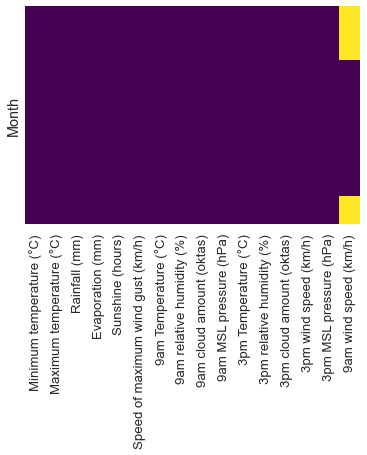

In [684]:
#Heatmap
#yellow colour represents the null values
sns.heatmap(Climate_new.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [685]:
#Null values replaced by 0
Climate_new.fillna(value=0,inplace=True)

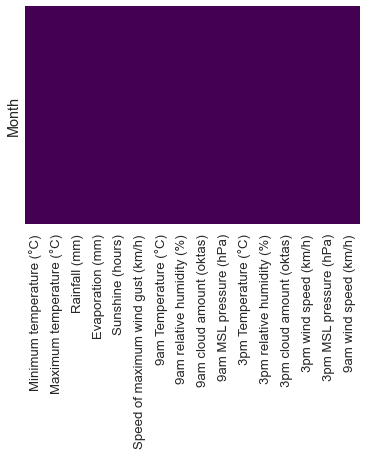

In [686]:
##Visualising the heatmap after removing null values
sns.heatmap(Climate_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [687]:
Climate_new.columns

Index(['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Speed of maximum wind gust (km/h)', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am MSL pressure (hPa)', '3pm Temperature (°C)',
       '3pm relative humidity (%)', '3pm cloud amount (oktas)',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)',
       '9am wind speed (km/h)'],
      dtype='object')

In [688]:
Climate_new.shape

(8, 16)

# Removing the unwanted dataset (columns) in Climate dataset

In [689]:
#Keeping the columns from Minimum temperature (°C) to Sunshine(hours) only
CC= Climate_new.drop(Climate_new.columns[5:], axis=1)

In [690]:
CC
CC.shape

(8, 5)

In [691]:
CC

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours)
Month,,,,,
January,20.594,28.971,2.561,7.760,5.400
February,20.000,27.479,14.979,6.831,6.279
March,17.216,25.619,5.852,5.213,5.897
April,15.360,24.483,0.987,5.464,6.279
May,11.503,20.252,4.458,3.906,6.020
June,9.743,18.707,2.766,2.520,5.727
July,9.513,18.216,6.973,3.253,5.803
August,9.142,19.461,2.561,3.981,8.061


## Heatmap of Joined Climate Dataset

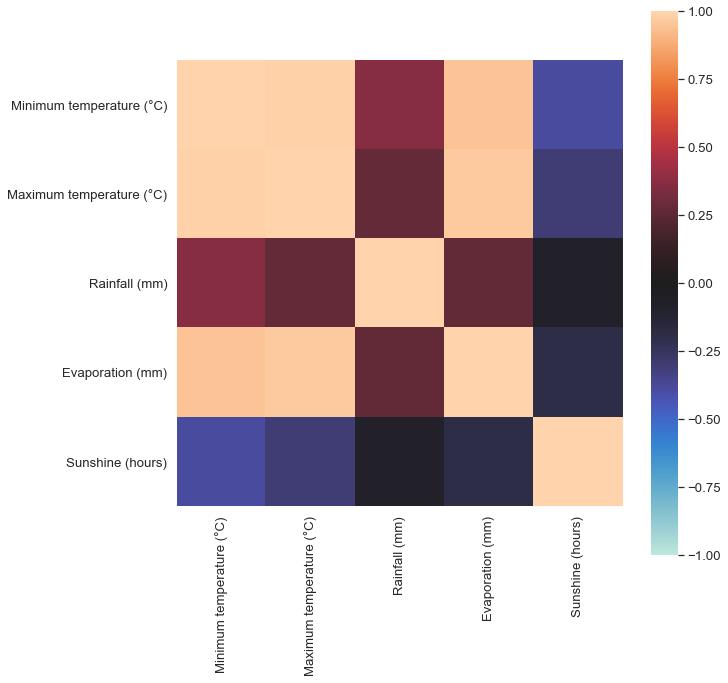

In [692]:
#Heatmap
correlation= CC.corr()
plt.figure(figsize=(10,10)) 
correlation_plot= sns.heatmap(correlation,vmin= -1, vmax=1, center=0, square=True)

## Pairplot of Joined Climate Dataset

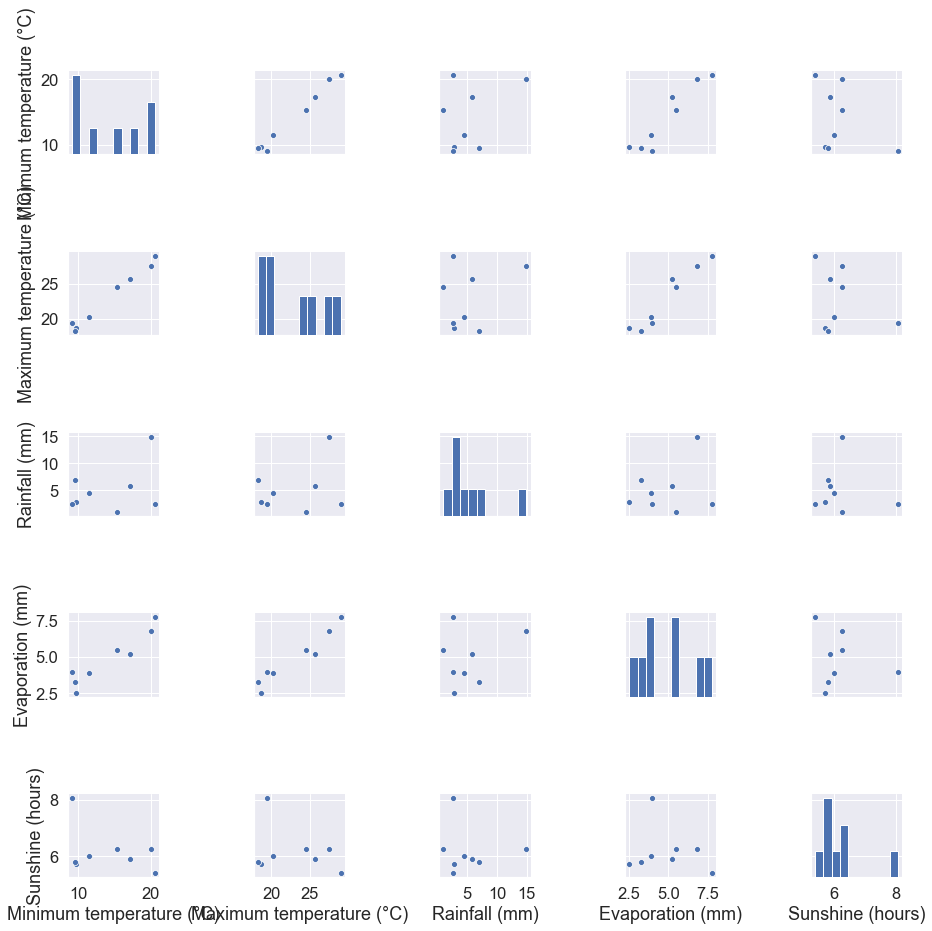

In [693]:
#Pairplot to also show the correlation between the variables
sns.set(font_scale = 1.5)
pair_plt= sns.pairplot(CC)

**Interpretation of Heatmap and Pairplot: <br>**
From both the heatmap and pairplot it can be observed that Minimum Temperature, Maximum Temperature and Evaporation are strongly correlated to each other. All the other variables in the climate dataset are not correlated since they are scattered randomly.

In [694]:
CC.columns

Index(['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)'],
      dtype='object')

# PieChart showing minimum temperature

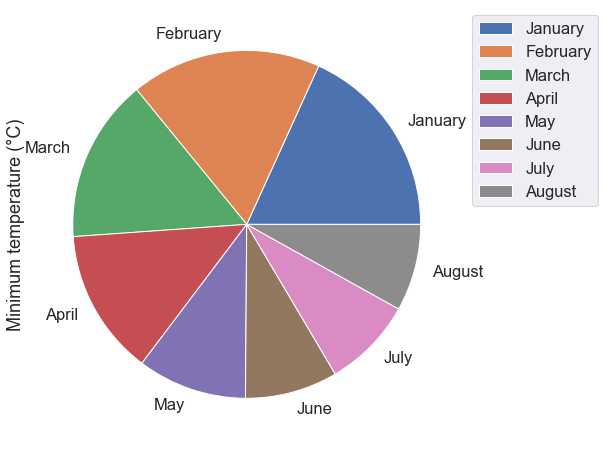

In [695]:
CC.plot.pie(y='Minimum temperature (°C)',figsize=(10, 8),subplots=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

**Interpretation:<br>**
From the pie char above for Minimum Temperature (°C) is the lowest in June, July and August and it is the highest from January until April. Since from May, the winter season starts in Sydney, it is quite obvious that from June until August the temperature is low. 

# PieChart showing maximum temperature


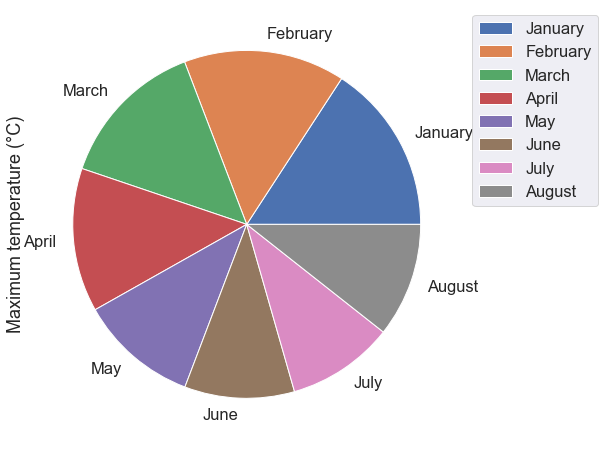

In [696]:
CC.plot.pie(y='Maximum temperature (°C)',figsize=(10, 8),subplots=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

**Interpretation:<br>**
The pie chart for Maximum Temperature is pretty much the same as pie chart for Minimum Temperature. The Maximum Temperature is high from January to May is because that is the summer season in Sydney. 

# PieChart showing Rainfall

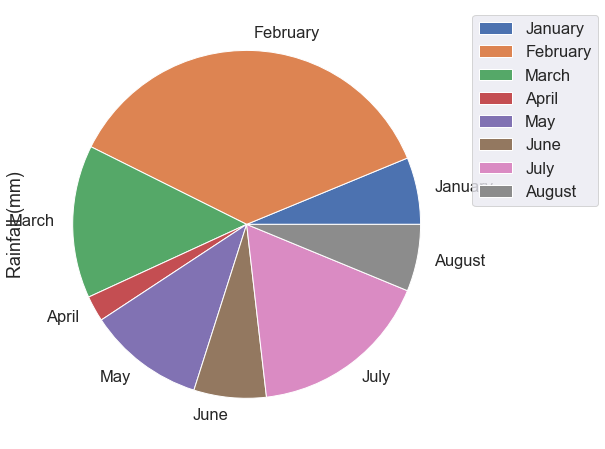

In [697]:
CC.plot.pie(y='Rainfall (mm)',figsize=(10, 8),subplots=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

**Interpretation:<br>**
February is when the autumn season starts in Sydney and the rainfall is also the maximum during February and March. 

# PieChart showing Evaporation

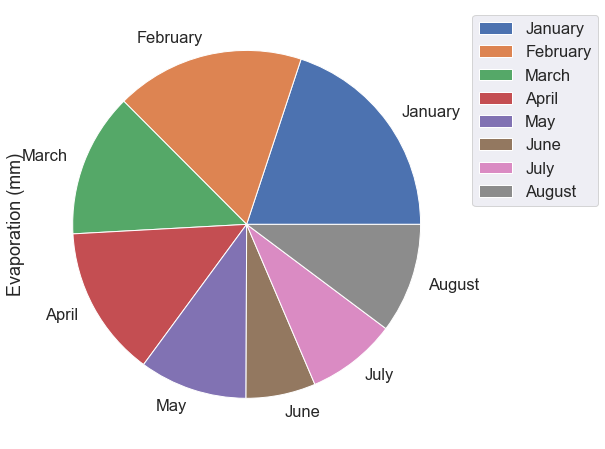

In [698]:
CC.plot.pie(y='Evaporation (mm)',figsize=(10, 8),subplots=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

**Interpretation:<br>**
Evaporation is high from January to April then it starts decreasing from May and in August it starts increasing again and August is the month where Spring starts in Sydney. Therefore, during winter season, evaporation is pretty low in Sydney.

# PieChart showing Sunshine

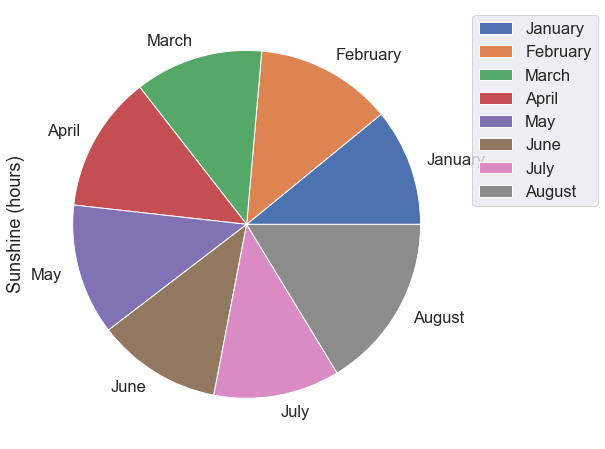

In [699]:
CC.plot.pie(y='Sunshine (hours)',figsize=(10, 8),subplots=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

**Interpretation:<br>**
Sunshine is pretty much the same every month. Therefore sunshine does not have any impact on the number of people travelling by bus. 

# Joining Climate and Bus Dataset

In [553]:
#Joining the climate and bus dataset
Clibus=pd.concat([Bus_2020, CC], axis=1,sort=True)
Clibus

,Adult,Adult Single Bus Trip 1,Adult Single Bus Trip 2,Adult Single Bus Trip 3,Child/Youth,Child/Youth Single Bus Trip 1,Child/Youth Single Bus Trip 2,Child/Youth Single Bus Trip 3,Concession,Employee,...,School Student,Senior/Pensioner,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours)
Month,,,,,,,,,,,,,,,,,,,,,
April,50746.000,1.000,0.000,0.000,4467.000,0.000,0.000,0.000,4829.000,346.000,...,684.000,36283.000,8256.000,0.000,8.000,15.360,24.483,0.987,5.464,6.279
August,75764.000,1.000,0.000,0.000,13902.000,0.000,0.000,0.000,9704.000,497.000,...,49807.000,57371.000,15567.000,0.000,4.000,9.142,19.461,2.561,3.981,8.061
February,127474.000,3243.000,1350.000,207.000,25713.000,542.000,364.000,50.000,19120.000,815.000,...,90252.000,88280.000,15561.000,3.000,28.000,20.000,27.479,14.979,6.831,6.279
January,118752.000,3506.000,1490.000,239.000,24157.000,886.000,518.000,114.000,14246.000,821.000,...,9497.000,83786.000,13414.000,5.000,22.000,20.594,28.971,2.561,7.760,5.400
July,79438.000,0.000,0.000,0.000,15137.000,0.000,2.000,0.000,9387.000,624.000,...,28114.000,58877.000,15341.000,0.000,7.000,9.513,18.216,6.973,3.253,5.803
June,76077.000,3.000,3.000,0.000,13819.000,0.000,0.000,0.000,9444.000,523.000,...,56517.000,60302.000,14540.000,1.000,11.000,9.743,18.707,2.766,2.520,5.727
March,109989.000,2053.000,726.000,145.000,18031.000,362.000,219.000,38.000,20385.000,760.000,...,65717.000,74314.000,14778.000,2.000,8.000,17.216,25.619,5.852,5.213,5.897
May,62683.000,1.000,0.000,0.000,9112.000,0.000,0.000,0.000,6748.000,414.000,...,21344.000,48268.000,11836.000,1.000,4.000,11.503,20.252,4.458,3.906,6.020


# Heatmap for the Joined Climate and Bus Dataset

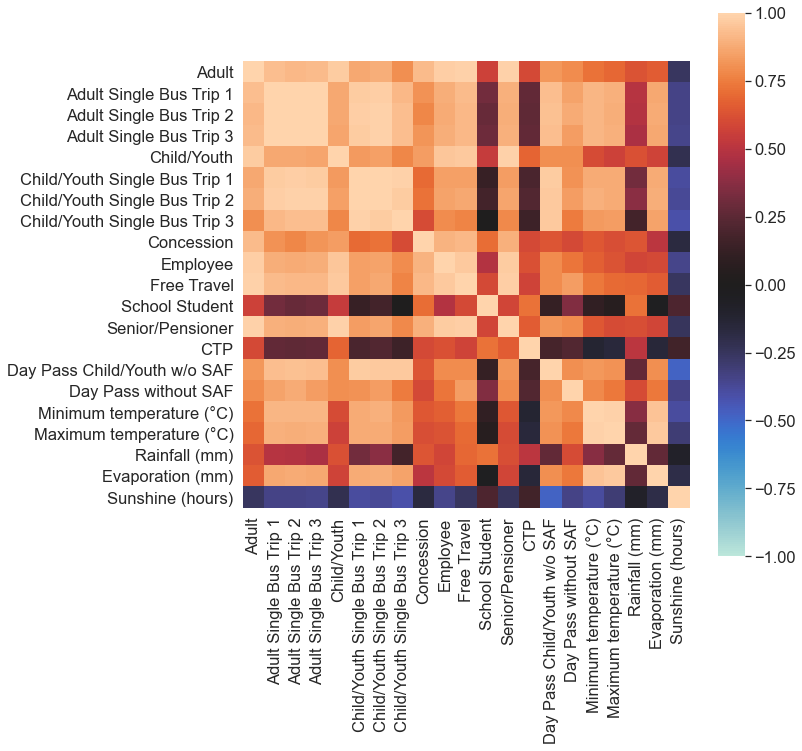

In [468]:
#Heatmap
correl= Clibus.corr()
plt.figure(figsize=(10,10)) 
correl_plot= sns.heatmap(correl,vmin= -1, vmax=1, center=0, square=True)

**Interpretation of Heatmap:<br>**
* From the heatmap above, maximum temperature, minimum temperature, rainfall and evaporation has correlation with some of the passengers but sunshine doesn't have any impact at all.

* Adult travellers are not really affected by the weather changes compared to the Adult Single Bus Trip 1,2, 3, Child/Youth,  Employee has a similar pattern with Adults. 

* Concession card holders, employee, free travel, senior/pensioner, school students, Day Pass Child/Youth w/o SAF, Day Pass without SAF is not really affected by the weather changes. 

In [554]:
Clibus.columns

Index(['Adult', 'Adult Single Bus Trip 1', 'Adult Single Bus Trip 2',
       'Adult Single Bus Trip 3', 'Child/Youth',
       'Child/Youth Single Bus Trip 1', 'Child/Youth Single Bus Trip 2',
       'Child/Youth Single Bus Trip 3', 'Concession', 'Employee',
       'Free Travel', 'School Student', 'Senior/Pensioner', 'CTP',
       'Day Pass Child/Youth w/o SAF', 'Day Pass without SAF',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)'],
      dtype='object')

In [555]:
Clibus.shape

(8, 21)

# Linear regression with low R square

In [594]:
#defining the mean absolute percentage error
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)/ y_true) *100

In [595]:
from math import sqrt

reg = linear_model.LinearRegression()


X_train = Clibus[['Adult Single Bus Trip 1', 'Adult Single Bus Trip 2',
       'Adult Single Bus Trip 3', 'Minimum temperature (°C)']]
y_train = Clibus['Adult']
train, test = train_test_split(Clibus, test_size=0.6)
print(test.shape)
print(train.shape)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.6, random_state=101)

X_train.shape

y_train.shape
#X_test = test_full
#y_test = testing[['Appliances']]
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("Scores on training set: ")
print('RMSE:', sqrt(mean_squared_error(y_train, y_train_pred)))
print('R squared:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MAPE:', MAPE(y_train, y_train_pred))
print()
print("Scores on testing set: ")
print('RMSE:', sqrt(mean_squared_error(y_test, y_test_pred)))
print('R squared:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MAPE:', MAPE(y_test, y_test_pred))


(5, 21)
(3, 21)
Scores on training set: 
RMSE: 1.925037439697619e-11
R squared: 1.0
MAE: 1.697723443309466e-11
MAPE: 2.0758460673959598e-14

Scores on testing set: 
RMSE: 11455.636837537686
R squared: 0.8198489139160268
MAE: 10145.247197866494
MAPE: 11.5734878800846


**Interpretation:** <br>

* The model is good since the R square is close to 0 which is 0.81985. However the other error like RMSE, MAE, MAPE is large which might be the result of larger values of variables and the outliers. 

* As mentioned earlier, variance in the number of the passengers in each category for each month is high. For instance, the highest mean is for Adults which is 87615.375 and the lowest is for Day Pass Child/Youth w/o SAF which is 1.500. 

In [596]:
from sklearn.metrics import r2_score
mse= ((np.array(y_test)- y_test_pred)**2).sum()/len(y_test)
r2 = r2_score(y_test, y_test_pred)
print("MSE", mse)
print("R squared", r2)

MSE 131231615.35355043
R squared 0.8198489139160268


### Actual Vs Predicted

In [599]:
ActualVsPredicted = []

In [600]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
ActualVsPredicted.append(rmse)

print(ActualVsPredicted)

[11455.636837537686]


In [601]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
Month,,
April,50746.000,41317.367
February,127474.000,113722.657
June,76077.000,72516.296
July,79438.000,73683.309
March,109989.000,91758.135


**Interpretation:** <br>
The values in predicted is closer to the actual values which is a good indication of a good model but it is not possible for the model to predict the actual number of travellers who is going to travel in future.

# RFE

# Trying to select best features

In [607]:
#Importing libraries for linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [608]:
X = Clibus[['Adult Single Bus Trip 1', 'Adult Single Bus Trip 2',
       'Adult Single Bus Trip 3', 'Child/Youth',
       'Child/Youth Single Bus Trip 1', 'Child/Youth Single Bus Trip 2',
       'Child/Youth Single Bus Trip 3', 'Concession', 'Employee',
       'Free Travel', 'School Student', 'Senior/Pensioner', 'CTP',
       'Day Pass Child/Youth w/o SAF', 'Day Pass without SAF',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)']]
y = Clibus['Adult']

train, test = train_test_split(Clibus, test_size=0.6)
print(test.shape)
print(train.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

X_train.shape

y_train.shape

(5, 21)
(3, 21)


(3,)

In [609]:
estimator = LinearRegression()
rmse_scores =[]
for i in range(1,18):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  5127.333927840528
RMSE score on test set using 2 features:  4706.709890551833
RMSE score on test set using 3 features:  4879.635165231391
RMSE score on test set using 4 features:  4844.903137389477
RMSE score on test set using 5 features:  4436.462888481809
RMSE score on test set using 6 features:  5533.003765770736
RMSE score on test set using 7 features:  5518.85752305031
RMSE score on test set using 8 features:  5516.282776973436
RMSE score on test set using 9 features:  5515.17659661411
RMSE score on test set using 10 features:  5514.26194995503
RMSE score on test set using 11 features:  5513.752962254264
RMSE score on test set using 12 features:  5513.337035161147
RMSE score on test set using 13 features:  5513.321916317018
RMSE score on test set using 14 features:  5513.3196782891355
RMSE score on test set using 15 features:  5513.318710471953
RMSE score on test set using 16 features:  5513.318610934394
RMSE score on test set using 17 fea

In [610]:
print('Optimal number of features :', selector.n_features_)
print('Best features :', X_train.columns[selector.support_])

Optimal number of features : 17
Best features : Index(['Adult Single Bus Trip 1', 'Adult Single Bus Trip 2',
       'Adult Single Bus Trip 3', 'Child/Youth',
       'Child/Youth Single Bus Trip 1', 'Child/Youth Single Bus Trip 2',
       'Child/Youth Single Bus Trip 3', 'Concession', 'Employee',
       'Free Travel', 'School Student', 'Senior/Pensioner', 'CTP',
       'Day Pass without SAF', 'Minimum temperature (°C)',
       'Maximum temperature (°C)', 'Evaporation (mm)'],
      dtype='object')


In [611]:
rmse_scores

[5127.333927840528,
 4706.709890551833,
 4879.635165231391,
 4844.903137389477,
 4436.462888481809,
 5533.003765770736,
 5518.85752305031,
 5516.282776973436,
 5515.17659661411,
 5514.26194995503,
 5513.752962254264,
 5513.337035161147,
 5513.321916317018,
 5513.3196782891355,
 5513.318710471953,
 5513.318610934394,
 5175.058201938727]

## Line Graph of RMSE score on test set using RFE

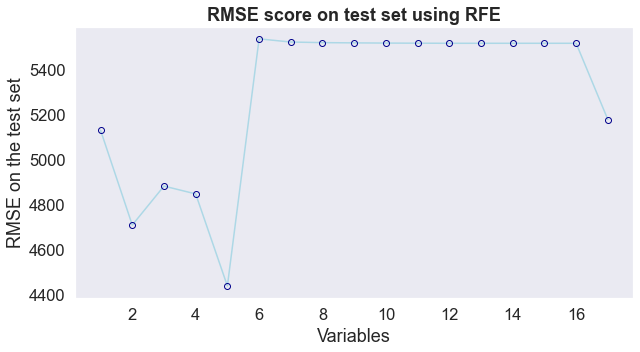

In [612]:
plt.figure(figsize=(10,5))
plt.grid()   
plt.xlabel('Variables')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18, fontweight='bold')
plt.plot(range(1, 18), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.show()

**Intpretation:** <br>
RMSE Score is pretty high for all the number of variables but variables ranging between 1 to 6 give low score. It is better to select combination of variables between 1 to 6 to get better results.

Text(0.5, 1.0, 'Boxplot showing distribution of types of passengers')

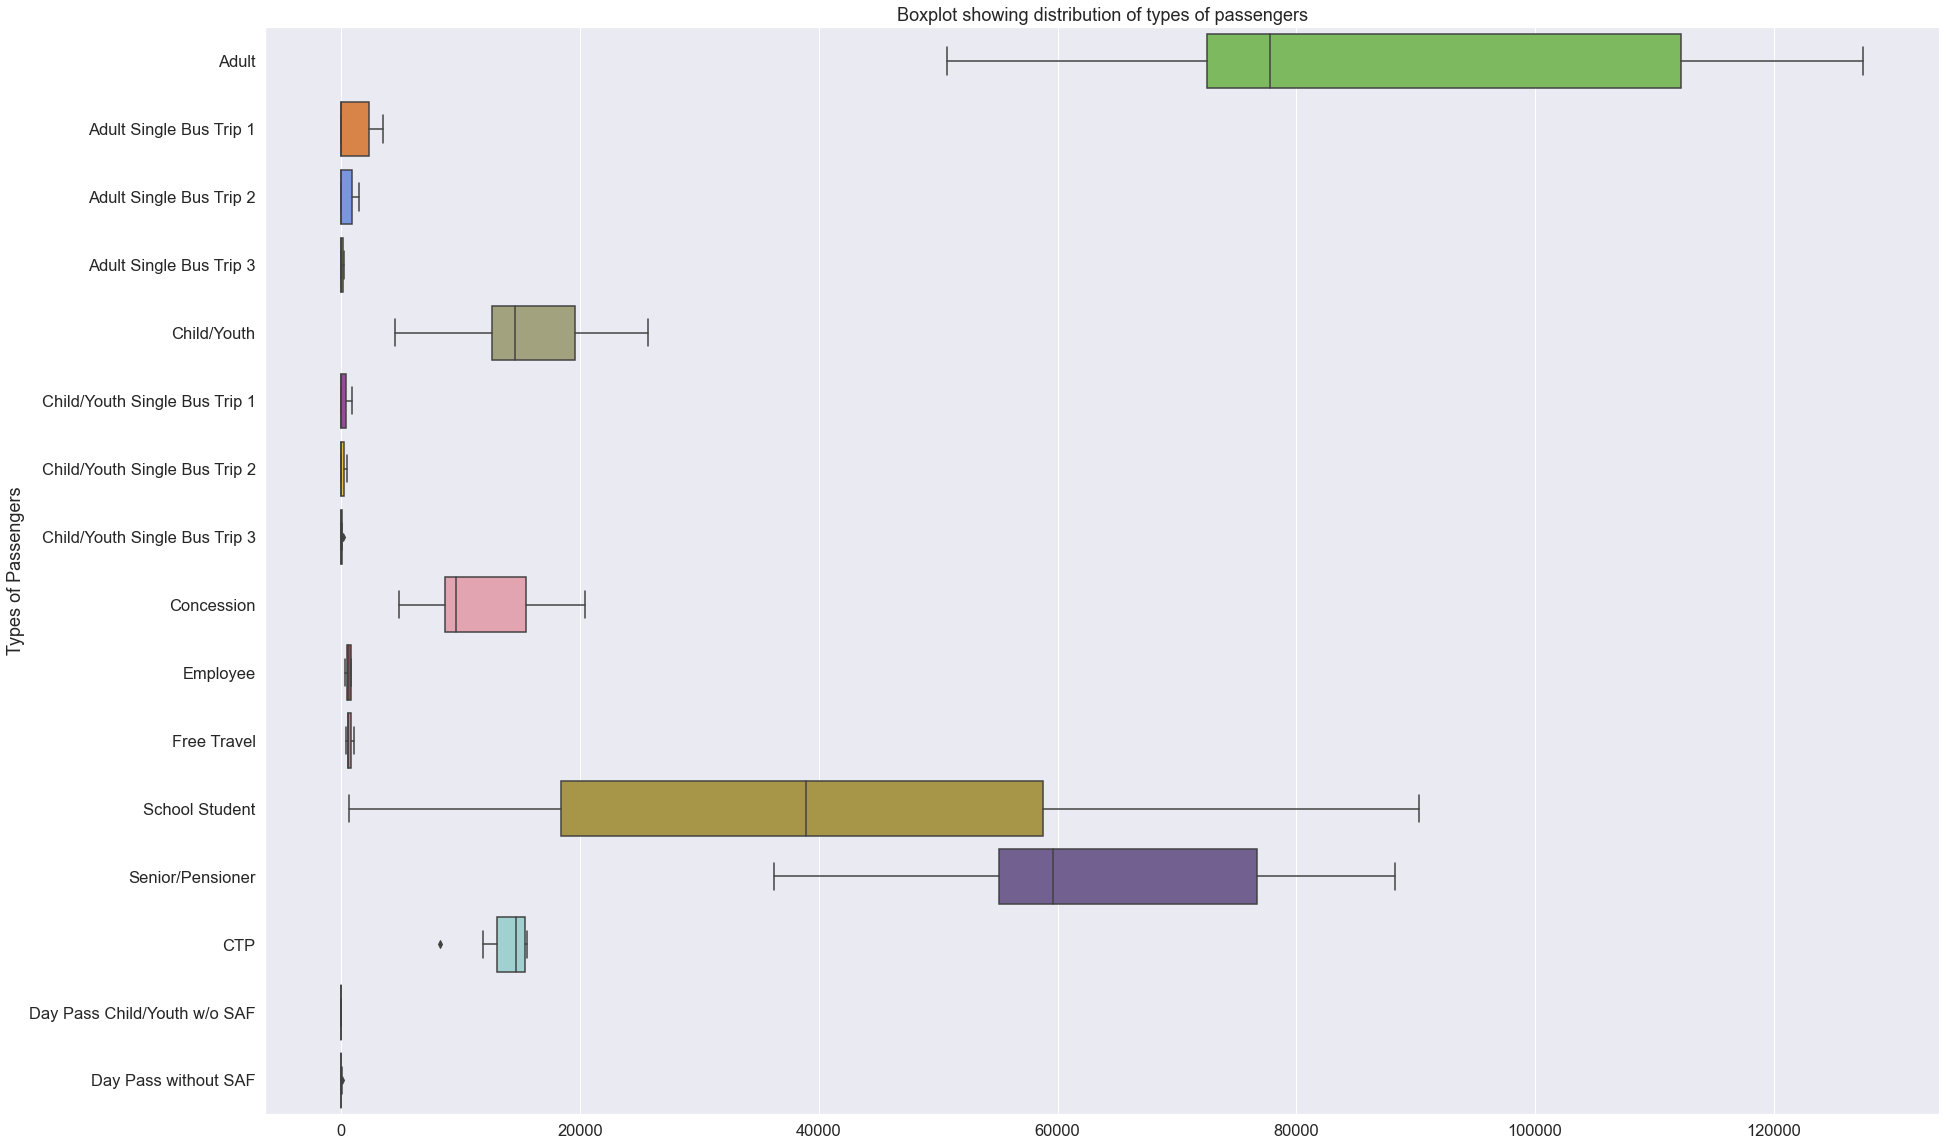

In [591]:
#Boxplot
plt.figure(figsize=(30,20))
sns.boxplot(data=Bus_2020, palette = Color_palette , orient='horizontal')
plt.title("Boxplot showing distribution of types of passengers")

**Intpretation:** <br>
As it can be seen in the above boxplot we have Adult, school student and Senior/Pensioner who are frequently travelling. So just focusing on these variables. Also our RFE results show that it is better to select variables between 1-6.

# Linear Regression with high R Squared. 

In [613]:
X = Clibus[['School Student', 'Senior/Pensioner', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)']]
y = Clibus['Adult']

train, test = train_test_split(Clibus, test_size=0.6)
print(test.shape)
print(train.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

X_train.shape

y_train.shape

reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("Scores on training set: ")
print('RMSE:', sqrt(mean_squared_error(y_train, y_train_pred)))
print('R squared:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MAPE:', MAPE(y_train, y_train_pred))
print()
print("Scores on testing set: ")
print('RMSE:', sqrt(mean_squared_error(y_test, y_test_pred)))
print('R squared:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MAPE:', MAPE(y_test, y_test_pred))

(5, 21)
(3, 21)
Scores on training set: 
RMSE: 2.0579515874459978e-11
R squared: 1.0
MAE: 1.9402553637822468e-11
MAPE: 2.2310021991540373e-14

Scores on testing set: 
RMSE: 5416.773608451769
R squared: 0.9597208979938915
MAE: 4751.42636610098
MAPE: 5.8176306010035335


**Intpretation:** <br>
R square has improved from 0.81 to 0.95. By reducing the number of variables, the R Square has improved from 0.81985 to 0.959721 which is closer to 1 that indicated a good prediction. 

In [614]:
ActualVsPredicted = []

In [615]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
ActualVsPredicted.append(rmse)

print(ActualVsPredicted)

[5416.773608451769]


In [616]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
Month,,
April,50746.000,44772.466
February,127474.000,122480.125
June,76077.000,80076.293
July,79438.000,79008.583
March,109989.000,101627.987


# Decision Tree

In [618]:
X = Clibus[['School Student', 'Senior/Pensioner', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)']]
y = Clibus['Adult']

train, test = train_test_split(Clibus, test_size=0.6)
print(test.shape)
print(train.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

X_train.shape

y_train.shape


(5, 21)
(3, 21)


(3,)

In [619]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [620]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [621]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\nPerformance Metric report: \n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]

Performance Metric report: 
               precision    recall  f1-score   support

     50746.0       0.00      0.00      0.00       1.0
     62683.0       0.00      0.00      0.00       0.0
     75764.0       0.00      0.00      0.00       0.0
     76077.0       0.00      0.00      0.00       1.0
     79438.0       0.00      0.00      0.00       1.0
    109989.0       0.00      0.00      0.00       1.0
    127474.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



In [622]:
ActualVsPredicted = []

In [623]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
ActualVsPredicted.append(rmse)

print(ActualVsPredicted)

[28289.08955410195]


In [624]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
Month,,
April,50746.000,62683.000
February,127474.000,75764.000
June,76077.000,75764.000
July,79438.000,75764.000
March,109989.000,75764.000


**Interpretation:** <br>
Decision Tree is not really a good model because the accuracy score is 0. Moreover, the difference in the actual and predicted values is quite large that also indicates that the decision tree is not a good model. 

# Joining Climate and Train Dataset

In [700]:
#Joining the climate and train dataset
CliT=pd.concat([Train_2020, CC], axis=1,sort=True)
CliT

,Employee,Free Travel,School Student,Senior/Pensioner,Sgl Trip Rail Adult,Sgl Trip Rail Child/Youth,Adult,Child/Youth,Concession,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours)
Month,,,,,,,,,,,,,,,,,
April,9302.000,356.000,723.000,77424.000,1061.000,544.000,825095.000,14108.000,27136.000,157178.000,0.000,23.000,15.360,24.483,0.987,5.464,6.279
August,11715.000,770.000,55617.000,141012.000,2015.000,1345.000,1626672.000,63305.000,114764.000,480483.000,3.000,21.000,9.142,19.461,2.561,3.981,8.061
February,16100.000,1466.000,70329.000,227233.000,7304.000,2400.000,3620407.000,148099.000,223074.000,826923.000,10.000,154.000,20.000,27.479,14.979,6.831,6.279
January,15967.000,1415.000,7222.000,244946.000,8952.000,4538.000,3621442.000,246406.000,175370.000,768801.000,13.000,179.000,20.594,28.971,2.561,7.760,5.400
July,12836.000,948.000,33011.000,157727.000,2811.000,2172.000,1811153.000,115795.000,115286.000,534928.000,12.000,56.000,9.513,18.216,6.973,3.253,5.803
June,12288.000,887.000,60685.000,154230.000,2736.000,1594.000,1548468.000,63674.000,84489.000,428762.000,4.000,64.000,9.743,18.707,2.766,2.520,5.727
March,14335.000,1087.000,52495.000,170736.000,4448.000,1621.000,2634216.000,86029.000,193597.000,596378.000,22.000,116.000,17.216,25.619,5.852,5.213,5.897
May,9613.000,527.000,22469.000,101267.000,1595.000,1001.000,1196383.000,38105.000,51269.000,285051.000,0.000,48.000,11.503,20.252,4.458,3.906,6.020


# Heatmap for the Joined Climate and Train Dataset

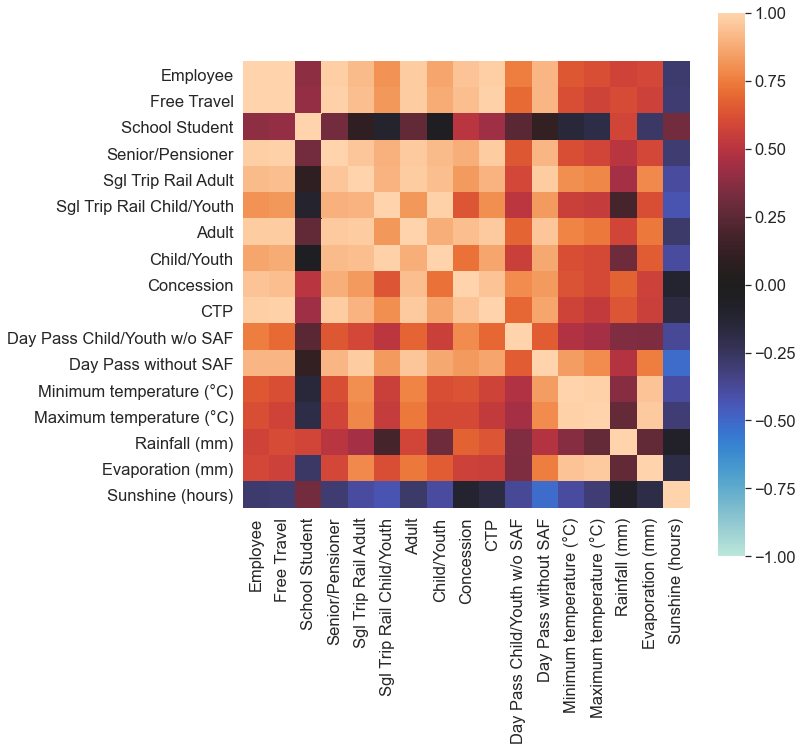

In [701]:
#Heatmap
correl= CliT.corr()
plt.figure(figsize=(10,10)) 
correl_plot= sns.heatmap(correl,vmin= -1, vmax=1, center=0, square=True)

**Intepretation of Heatmap:<br>**
* Compared to the bus dataset, the travellers in train dataset are least affected by weather conditions. Sunshine is once again does not affect the number of travellers travelling by train. 

In [702]:
CliT.columns

Index(['Employee', 'Free Travel', 'School Student', 'Senior/Pensioner',
       'Sgl Trip Rail Adult', 'Sgl Trip Rail Child/Youth', 'Adult',
       'Child/Youth', 'Concession', 'CTP', 'Day Pass Child/Youth w/o SAF',
       'Day Pass without SAF', 'Minimum temperature (°C)',
       'Maximum temperature (°C)', 'Rainfall (mm)', 'Evaporation (mm)',
       'Sunshine (hours)'],
      dtype='object')

In [703]:
CliT.shape

(8, 17)

# Linear regression with low R square for Train

In [706]:
from math import sqrt
reg = linear_model.LinearRegression()


X_train = CliT[['Sgl Trip Rail Adult', 'Employee',
       'CTP', 'Minimum temperature (°C)']]
y_train = CliT['Adult']
train, test = train_test_split(CliT, test_size=0.6)
print(test.shape)
print(train.shape)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.6, random_state=101)

X_train.shape

y_train.shape
#X_test = test_full
#y_test = testing[['Appliances']]
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("Scores on training set: ")
print('RMSE:', sqrt(mean_squared_error(y_train, y_train_pred)))
print('R squared:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MAPE:', MAPE(y_train, y_train_pred))
print()
print("Scores on testing set: ")
print('RMSE:', sqrt(mean_squared_error(y_test, y_test_pred)))
print('R squared:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MAPE:', MAPE(y_test, y_test_pred))


(5, 17)
(3, 17)
Scores on training set: 
RMSE: 3.928334369896527e-09
R squared: 1.0
MAE: 3.259629011154175e-09
MAPE: 1.5479781360089604e-13

Scores on testing set: 
RMSE: 187134.89092535604
R squared: 0.962012089867328
MAE: 171642.21114590802
MAPE: 8.54470157755383


**Intepretation:** <br>

* The model is good since the R square is close to 0 which is 0.962012. However the other error like RMSE, MAE, MAPE is large which might be the result of larger values of variables and the outliers. 

In [707]:
from sklearn.metrics import r2_score
mse= ((np.array(y_test)- y_test_pred)**2).sum()/len(y_test)
r2 = r2_score(y_test, y_test_pred)
print("MSE", mse)
print("R squared", r2)

MSE 35019467401.6449
R squared 0.962012089867328


### Actual Vs Predicted

In [709]:
ActualVsPredicted = []

In [710]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
ActualVsPredicted.append(rmse)

print(ActualVsPredicted)

[187134.89092535604]


In [711]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
Month,,
April,825095.000,901256.068
February,3620407.000,3361328.293
June,1548468.000,1729062.819
July,1811153.000,1908348.856
March,2634216.000,2389035.395


**Intepretation:** <br>
The number of passengers predicted for April, June and March are overpredicted and the same is underpredicted for February and March. It seems model is not a good fit.


# RFE

## Trying to select the best features

In [ ]:
#Importing libraries for linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [712]:
X = CliT[['Employee', 'Free Travel', 'School Student', 'Senior/Pensioner',
       'Sgl Trip Rail Adult', 'Sgl Trip Rail Child/Youth', 'Adult',
       'Child/Youth', 'Concession', 'CTP', 'Day Pass Child/Youth w/o SAF',
       'Day Pass without SAF', 'Minimum temperature (°C)',
       'Maximum temperature (°C)', 'Rainfall (mm)', 'Evaporation (mm)',
       'Sunshine (hours)']]
y = CliT['Adult']

train, test = train_test_split(CliT, test_size=0.6)
print(test.shape)
print(train.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

X_train.shape

y_train.shape

(5, 17)
(3, 17)


(3,)

In [713]:
estimator = LinearRegression()
rmse_scores =[]
for i in range(1,18):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  4.197414120966556e-10
RMSE score on test set using 2 features:  1.1129694434550703e-09
RMSE score on test set using 3 features:  5356.082070304682
RMSE score on test set using 4 features:  5400.921827311097
RMSE score on test set using 5 features:  7829.517348772229
RMSE score on test set using 6 features:  8097.891716716568
RMSE score on test set using 7 features:  8100.5574927520765
RMSE score on test set using 8 features:  8102.523203376908
RMSE score on test set using 9 features:  8102.7171667424545
RMSE score on test set using 10 features:  8102.722210266943
RMSE score on test set using 11 features:  8102.721485929743
RMSE score on test set using 12 features:  8102.7214718198975
RMSE score on test set using 13 features:  8102.721466756918
RMSE score on test set using 14 features:  8102.721460956658
RMSE score on test set using 15 features:  8102.721460390714
RMSE score on test set using 16 features:  8102.721460845494
RMSE score on test se

In [714]:
print('Optimal number of features :', selector.n_features_)
print('Best features :', X_train.columns[selector.support_])

Optimal number of features : 17
Best features : Index(['Employee', 'Free Travel', 'School Student', 'Senior/Pensioner',
       'Sgl Trip Rail Adult', 'Sgl Trip Rail Child/Youth', 'Adult',
       'Child/Youth', 'Concession', 'CTP', 'Day Pass Child/Youth w/o SAF',
       'Day Pass without SAF', 'Minimum temperature (°C)',
       'Maximum temperature (°C)', 'Rainfall (mm)', 'Evaporation (mm)',
       'Sunshine (hours)'],
      dtype='object')


In [715]:
rmse_scores

[4.197414120966556e-10,
 1.1129694434550703e-09,
 5356.082070304682,
 5400.921827311097,
 7829.517348772229,
 8097.891716716568,
 8100.5574927520765,
 8102.523203376908,
 8102.7171667424545,
 8102.722210266943,
 8102.721485929743,
 8102.7214718198975,
 8102.721466756918,
 8102.721460956658,
 8102.721460390714,
 8102.721460845494,
 8102.721453306416]

## Line Graph of RMSE score on test set using RFE

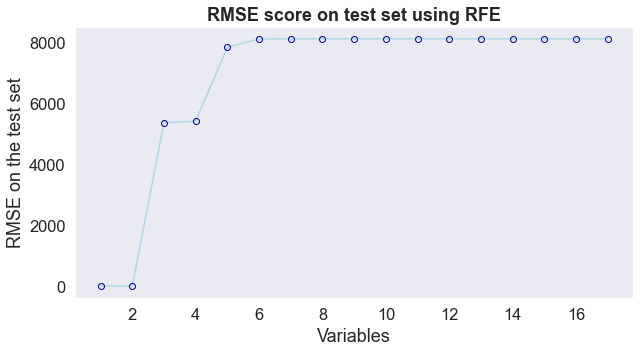

In [716]:
plt.figure(figsize=(10,5))
plt.grid()   
plt.xlabel('Variables')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18, fontweight='bold')
plt.plot(range(1, 18), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.show()

**Intpretation:** <br>
RMSE Score is pretty high for all the number of variables but variables ranging between 1 to 4 give low score. It is better to select combination of variables between 1 to 4 to get better results.

Text(0.5, 1.0, 'Boxplot showing distribution of types of passengers')

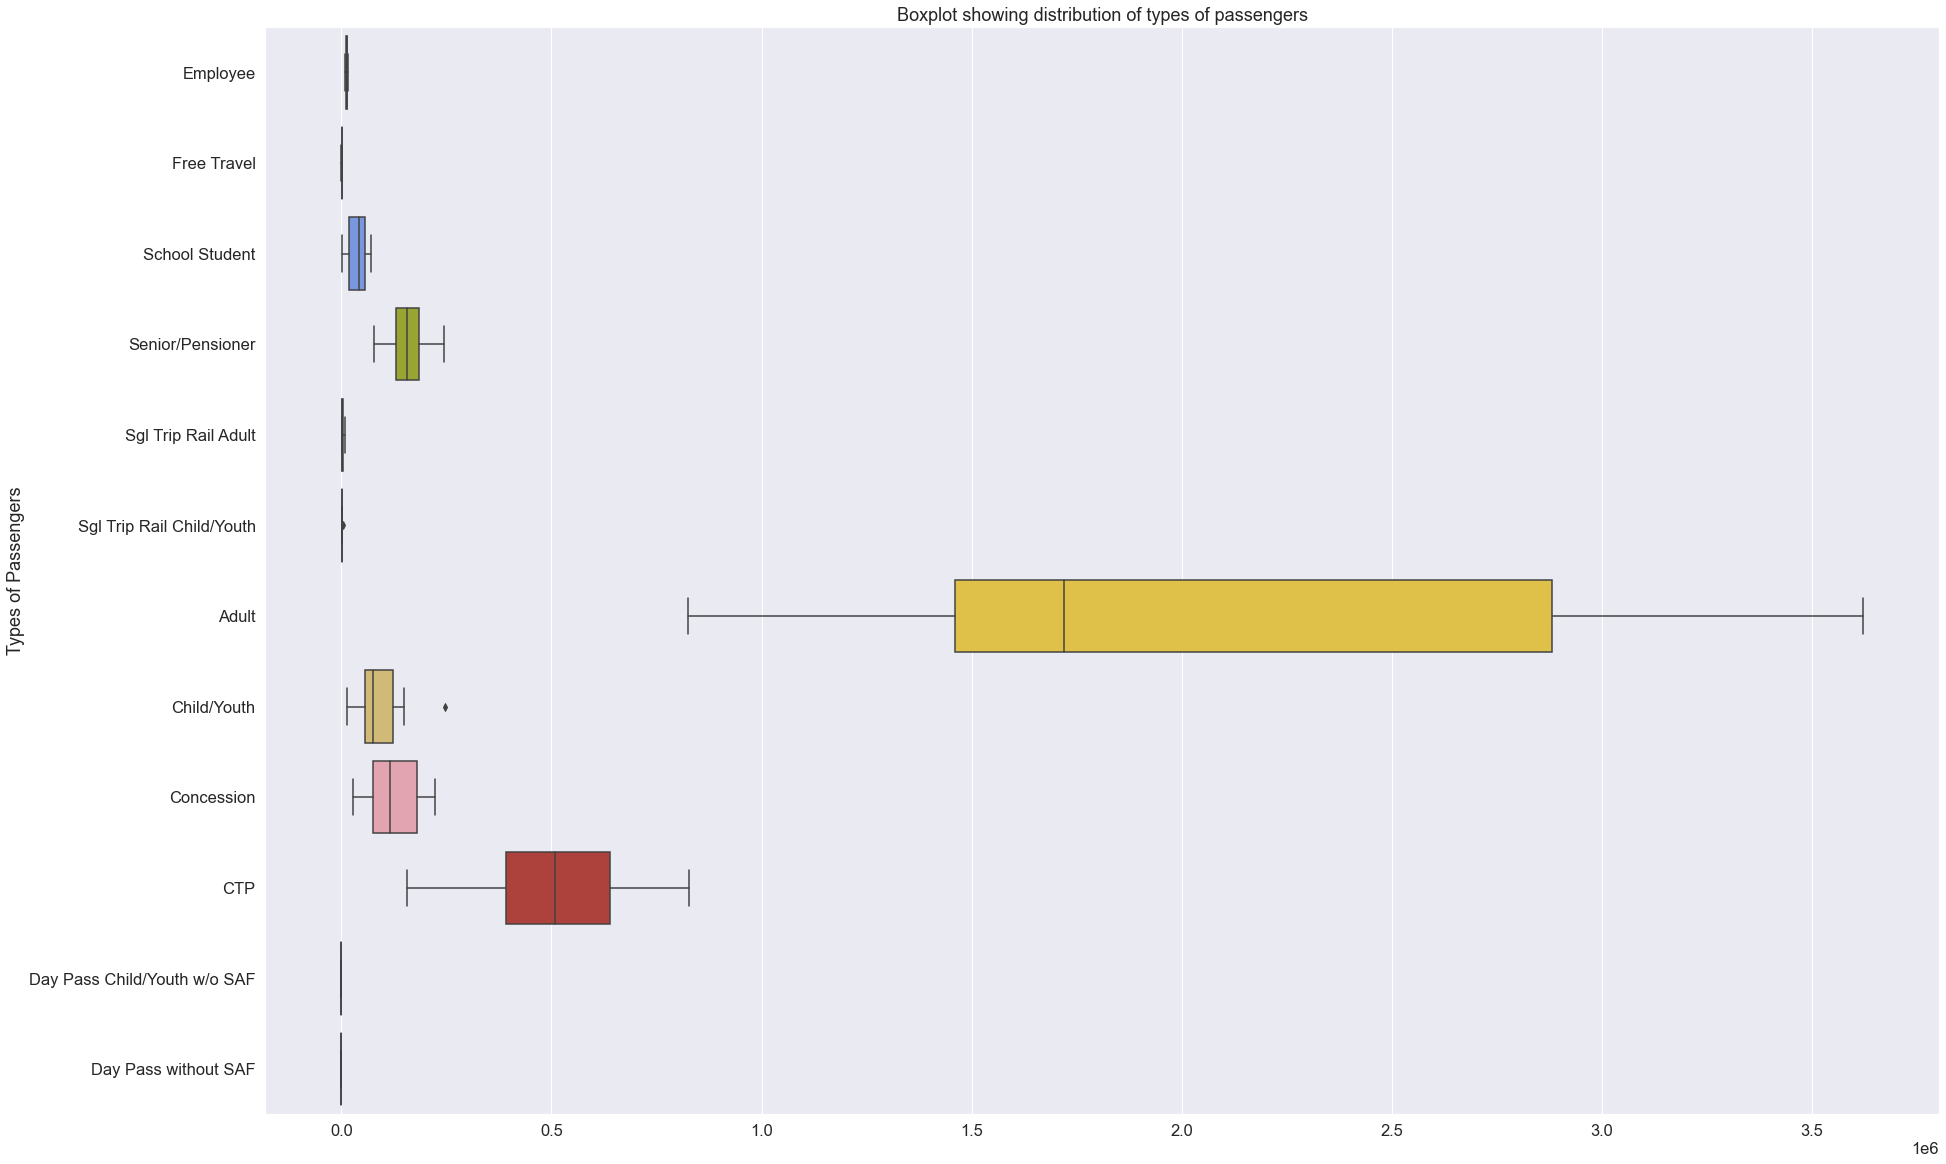

In [717]:
#Boxplot
plt.figure(figsize=(30,20))
sns.boxplot(data=Train_2020, palette = Color_palette , orient='horizontal')
plt.title("Boxplot showing distribution of types of passengers")

**Intpretation:** <br>
As it can be seen in the above boxplot we have Adult, CTP, concession and child/youth who are frequently travelling. So just focusing on these variables. Also our RFE results show that it is better to select variables between 1-4.

# Linear Regression with high R Squared.

In [718]:
X = CliT[['School Student', 'CTP', 'Maximum temperature (°C)', 'Rainfall (mm)']]
y = CliT['Adult']

train, test = train_test_split(CliT, test_size=0.6)
print(test.shape)
print(train.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

X_train.shape

y_train.shape

reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("Scores on training set: ")
print('RMSE:', sqrt(mean_squared_error(y_train, y_train_pred)))
print('R squared:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MAPE:', MAPE(y_train, y_train_pred))
print()
print("Scores on testing set: ")
print('RMSE:', sqrt(mean_squared_error(y_test, y_test_pred)))
print('R squared:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MAPE:', MAPE(y_test, y_test_pred))

(5, 17)
(3, 17)
Scores on training set: 
RMSE: 5.542477925418915e-10
R squared: 1.0
MAE: 3.880510727564494e-10
MAPE: 1.334340370749091e-14

Scores on testing set: 
RMSE: 393022.2622443212
R squared: 0.832440071096115
MAE: 349872.6515594162
MAPE: 16.049064441084372


**Intpretation:** <br>
R square has actually reduced  from 0.96 to 0.83. By reducing the number of variables, the R Square has declined. However, for bus reduction in variables has shown improvement.

In [719]:
ActualVsPredicted = []

In [720]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
ActualVsPredicted.append(rmse)

print(ActualVsPredicted)

[393022.2622443212]


In [721]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
Month,,
April,825095.000,915636.884
February,3620407.000,3005132.190
June,1548468.000,1319340.365
July,1811153.000,2191594.951
March,2634216.000,2200239.023


# Decision Tree

In [722]:
X = CliT[['School Student', 'CTP', 'Maximum temperature (°C)', 'Rainfall (mm)']]
y = CliT['Adult']

train, test = train_test_split(CliT, test_size=0.6)
print(test.shape)
print(train.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

X_train.shape

y_train.shape

(5, 17)
(3, 17)


(3,)

In [723]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [724]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [725]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\nPerformance Metric report: \n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]

Performance Metric report: 
               precision    recall  f1-score   support

    825095.0       0.00      0.00      0.00       1.0
   1196383.0       0.00      0.00      0.00       0.0
   1548468.0       0.00      0.00      0.00       1.0
   1626672.0       0.00      0.00      0.00       0.0
   1811153.0       0.00      0.00      0.00       1.0
   2634216.0       0.00      0.00      0.00       1.0
   3620407.0       0.00      0.00      0.00       1.0
   3621442.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



In [726]:
ActualVsPredicted = []

In [727]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
ActualVsPredicted.append(rmse)

print(ActualVsPredicted)

[488497.66981675563]


In [728]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
Month,,
April,825095.000,1196383.000
February,3620407.000,3621442.000
June,1548468.000,1626672.000
July,1811153.000,1626672.000
March,2634216.000,1626672.000


# Conclusion

* Therefore, from the graphs and statistics, it can be observed that weather does not really have an impact on people travelling in Sydney by bus and also train. The number of adults, seniors/pensioners, school students, CTP, child/youth will not drop or increase due to the changes in the climate. Only during lockdown due to COVID-19 we could observe that there was a significant drop in the number of passengers travelling by both the bus and train. In the nutshell, other variables may have an impact on the usage of public transportation such as bus and train Sydney but definitely not weather or climatic changes. 

#  This project was done only by Nandini Jaiswal (44446128) and Barathi Priya S Somasundram (45795355).